Name : Gottapu Leela Satya swarup sai \
Id : 12040580

Data Collection : https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data (Until 2021)

**References:**\
1.Converting non-stationary to stationary : https://www.youtube.com/watch?v=MVsKaYzEggY&ab_channel=UnfoldDataScience \
2.Time series analysis and ARIMA : https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/#h2_10  \

3 .EDA and Auto ARIMA - https://www.youtube.com/watch?v=MngVV_4l9Po&ab_channel=AIEngineering \
4.RNN and LSTM on Time series : https://www.youtube.com/watch?v=S8tpSG6Q2H0&ab_channel=NachiketaHebbar & https://www.youtube.com/watch?v=H6du_pfuznE&ab_channel=KrishNaik .

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"satyaswarup3","key":"e59999ac6bb7d9f2b0d393fefd4d2e7e"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle datasets download -d rohanrao/nifty50-stock-market-data

nifty50-stock-market-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip nifty50-stock-market-data

Archive:  nifty50-stock-market-data.zip
replace ADANIPORTS.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ADANIPORTS.csv          
  inflating: ASIANPAINT.csv          
  inflating: AXISBANK.csv            
  inflating: BAJAJ-AUTO.csv          
  inflating: BAJAJFINSV.csv          
  inflating: BAJFINANCE.csv          
  inflating: BHARTIARTL.csv          
  inflating: BPCL.csv                
  inflating: BRITANNIA.csv           
  inflating: CIPLA.csv               
  inflating: COALINDIA.csv           
  inflating: DRREDDY.csv             
  inflating: EICHERMOT.csv           
  inflating: GAIL.csv                
  inflating: GRASIM.csv              
  inflating: HCLTECH.csv             
  inflating: HDFC.csv                
  inflating: HDFCBANK.csv            
  inflating: HEROMOTOCO.csv          
  inflating: HINDALCO.csv            
  inflating: HINDUNILVR.csv          
  inflating: ICICIBANK.csv           
  inflating: INDUSINDBK.csv          
  inflating: INFRATEL.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Loading the dataset

1.parse_dates --> argument in the read_csv() - gives us the option to convert the column containing date to convert into date \
2.index_col --> argument in the read_csv() - gives us the option to convert the date column into index column

In [7]:
stocks=pd.read_csv('NIFTY50_all.csv',parse_dates=['Date'], index_col= ['Date'])
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235192 entries, 2007-11-27 to 2021-04-30
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Symbol              235192 non-null  object 
 1   Series              235192 non-null  object 
 2   Prev Close          235192 non-null  float64
 3   Open                235192 non-null  float64
 4   High                235192 non-null  float64
 5   Low                 235192 non-null  float64
 6   Last                235192 non-null  float64
 7   Close               235192 non-null  float64
 8   VWAP                235192 non-null  float64
 9   Volume              235192 non-null  int64  
 10  Turnover            235192 non-null  float64
 11  Trades              120344 non-null  float64
 12  Deliverable Volume  219115 non-null  float64
 13  %Deliverble         219115 non-null  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 26.9+ MB


There are null values in trades.

In [8]:
stocks.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

Thus we can see conversion into datetime. 

In [9]:
stocks.head()

Symbol Series  Prev Close    Open     High    Low   Last  \
Date                                                                       
2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

             Close    VWAP    Volume      Turnover  Trades  \
Date                                                         
2007-11-27  962.90  984.72  27294366  2.687719e+15     NaN   
2007-11-28  893.90  941.38   4581338  4.312765e+14     NaN   
2007-11-29  884.20  888.09   5124121  4.550658e+14     NaN   
2007-11-30  921.55  929.17   4609762  4.283257e+14     NaN   
2007-12-03  969.30  965.65   2977470  2.875200e+14     NaN   

            Deliverable Volume  %Deliverble  
Date                                         
2007-11-27           9859619.0       0.3612  
2007-11-28           1453278.0       0.3172  
2007-11-29           1069678.0       0.2088  
2007-11-30           1260913.0       0.2735  
2007-12-03            816123.0       0.2741

In [10]:
stocks['Symbol'].unique()

array(['MUNDRAPORT', 'ADANIPORTS', 'ASIANPAINT', 'UTIBANK', 'AXISBANK',
       'BAJAJ-AUTO', 'BAJAJFINSV', 'BAJAUTOFIN', 'BAJFINANCE', 'BHARTI',
       'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA', 'DRREDDY',
       'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROHONDA', 'HEROMOTOCO', 'HINDALC0', 'HINDALCO', 'HINDLEVER',
       'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK', 'INFOSYSTCH', 'INFY',
       'IOC', 'ITC', 'JSWSTL', 'JSWSTEEL', 'KOTAKMAH', 'KOTAKBANK', 'LT',
       'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA', 'TELCO', 'TATAMOTORS',
       'TISCO', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'SESAGOA', 'SSLT', 'VEDL', 'WIPRO', 'ZEETELE',
       'ZEEL'], dtype=object)

In [11]:
len(stocks['Symbol'].unique())

65

Minimizing this to 50 stocks,as some stocks 2 and more than two names/symbols.

Stationary time series - Mean does not change with time for a period.(data fluctuates around mean) \
Non stationary time series - Mean changes with time continuosly, \
We can predict on non stationary time series using traditional methods of ML.So we convert our data to stationary time series.

In [12]:
stocks.loc[stocks['Symbol'] == 'MUNDRAPORT','Symbol'] = 'ADANIPORTS'
stocks.loc[stocks['Symbol'] == 'BAJAUTOFIN','Symbol'] = 'BAJFINANCE'
stocks.loc[stocks['Symbol'] == 'HINDALC0','Symbol'] = 'HINDALCO'
stocks.loc[stocks['Symbol'] == 'KOTAKMAH','Symbol'] = 'KOTAKBANK'
stocks.loc[stocks['Symbol'] == 'UTIBANK','Symbol'] = 'AXISBANK'
stocks.loc[stocks['Symbol'] == 'ZEETELE','Symbol'] = 'ZEEL'
stocks.loc[stocks['Symbol'] == 'INFOSYSTCH','Symbol'] = 'INFY'
stocks.loc[stocks['Symbol'] == 'BHARTI','Symbol'] = 'BHARTIARTL'
stocks.loc[stocks['Symbol'] == 'SESAGOA','Symbol'] = 'VEDL'
stocks.loc[stocks['Symbol'] == 'HEROHONDA','Symbol'] = 'HEROMOTOCO'
stocks.loc[stocks['Symbol'] == 'TELCO','Symbol'] = 'TATAMOTORS'
stocks.loc[stocks['Symbol'] == 'TISCO','Symbol'] = 'TATASTEEL'
stocks.loc[stocks['Symbol'] == 'HINDLEVER','Symbol'] = 'HINDUNILVR'
stocks.loc[stocks['Symbol'] == 'JSWSTL','Symbol'] = 'JSWSTEEL'
stocks.loc[stocks['Symbol'] == 'SSLT','Symbol'] = 'VEDL'

In [13]:
stocks.head()

Symbol Series  Prev Close    Open     High    Low   Last  \
Date                                                                       
2007-11-27  ADANIPORTS     EQ      440.00  770.00  1050.00  770.0  959.0   
2007-11-28  ADANIPORTS     EQ      962.90  984.00   990.00  874.0  885.0   
2007-11-29  ADANIPORTS     EQ      893.90  909.00   914.75  841.0  887.0   
2007-11-30  ADANIPORTS     EQ      884.20  890.00   958.00  890.0  929.0   
2007-12-03  ADANIPORTS     EQ      921.55  939.75   995.00  922.0  980.0   

             Close    VWAP    Volume      Turnover  Trades  \
Date                                                         
2007-11-27  962.90  984.72  27294366  2.687719e+15     NaN   
2007-11-28  893.90  941.38   4581338  4.312765e+14     NaN   
2007-11-29  884.20  888.09   5124121  4.550658e+14     NaN   
2007-11-30  921.55  929.17   4609762  4.283257e+14     NaN   
2007-12-03  969.30  965.65   2977470  2.875200e+14     NaN   

            Deliverable Volume  %Deliverble  
Date                                         
2007-11-27           9859619.0       0.3612  
2007-11-28           1453278.0       0.3172  
2007-11-29           1069678.0       0.2088  
2007-11-30           1260913.0       0.2735  
2007-12-03            816123.0       0.2741

In [14]:
len(stocks['Symbol'].unique())

50

Thus now we have 50 unique stocks.

Our main focus is on closing price.So we are only going to predict closing price(target variable).Now lets create a dataframe with only closing price related to that respective stocks.

In [15]:
stocks_df=pd.DataFrame()
for i in stocks['Symbol'].unique():
    stocks_df.loc[:,i] = stocks[stocks['Symbol'] == i]['Close']

In [16]:
stocks_df.head()

ADANIPORTS  ASIANPAINT  AXISBANK  BAJAJ-AUTO  BAJAJFINSV  \
Date                                                                   
2007-11-27      962.90      998.15    932.10         NaN         NaN   
2007-11-28      893.90     1006.45    905.70         NaN         NaN   
2007-11-29      884.20      998.10    918.85         NaN         NaN   
2007-11-30      921.55      990.00    930.65         NaN         NaN   
2007-12-03      969.30      986.60    942.35         NaN         NaN   

            BAJFINANCE  BHARTIARTL    BPCL  BRITANNIA   CIPLA  ...  TATASTEEL  \
Date                                                           ...              
2007-11-27      317.30      915.85  406.90    1516.45  183.60  ...     848.90   
2007-11-28      321.55      910.05  384.50    1482.90  182.85  ...     816.60   
2007-11-29      322.75      914.75  382.30    1493.35  182.00  ...     798.25   
2007-11-30      330.35      939.50  386.35    1492.35  183.10  ...     825.90   
2007-12-03      332.90      923.95  402.85    1468.10  185.25  ...     842.20   

                TCS    TECHM    TITAN  ULTRACEMCO  UNIPHOS  UPL     VEDL  \
Date                                                                       
2007-11-27   995.95  1040.00  1530.50     1000.65   337.10  NaN  3386.95   
2007-11-28   976.50  1035.45  1471.35      989.10   334.80  NaN  3332.45   
2007-11-29   966.05   986.15  1463.40      976.85   334.10  NaN  3260.70   
2007-11-30  1012.20  1026.70  1534.25      984.25   342.95  NaN  3450.70   
2007-12-03  1049.90  1058.15  1548.65      999.15   344.20  NaN  3500.65   

             WIPRO    ZEEL  
Date                        
2007-11-27  457.80  299.60  
2007-11-28  449.75  292.75  
2007-11-29  448.10  281.25  
2007-11-30  460.65  287.90  
2007-12-03  492.10  303.80  

[5 rows x 50 columns]

In [17]:
stocks_df.isnull().sum()

ADANIPORTS       0
ASIANPAINT       0
AXISBANK         0
BAJAJ-AUTO     120
BAJAJFINSV     121
BAJFINANCE       1
BHARTIARTL       0
BPCL             0
BRITANNIA        1
CIPLA            0
COALINDIA      724
DRREDDY          0
EICHERMOT        0
GAIL             0
GRASIM           0
HCLTECH          0
HDFC             0
HDFCBANK         0
HEROMOTOCO       0
HINDALCO         0
HINDUNILVR       0
ICICIBANK        0
INDUSINDBK       0
INFY             0
IOC              0
ITC              0
JSWSTEEL         0
KOTAKBANK        0
LT               0
M&M              0
MARUTI           0
NESTLEIND      516
NTPC             0
ONGC             0
POWERGRID        0
RELIANCE         0
SBIN             0
SHREECEM         0
SUNPHARMA        0
TATAMOTORS       0
TATASTEEL        0
TCS              0
TECHM            0
TITAN            0
ULTRACEMCO       0
UNIPHOS       1858
UPL           1464
VEDL             0
WIPRO            0
ZEEL             0
dtype: int64

In [18]:
#Filling the null values of stocks with bfill(backward filling) and ffill(forward filling)
stocks_df['BAJAJ-AUTO'] = stocks_df['BAJAJ-AUTO'].fillna(method='bfill')
stocks_df['BAJAJFINSV'] = stocks_df['BAJAJFINSV'].fillna(method='bfill')
stocks_df['COALINDIA'] = stocks_df['COALINDIA'].fillna(method='bfill')
stocks_df['NESTLEIND'] = stocks_df['NESTLEIND'].fillna(method='bfill')
stocks_df['UNIPHOS'] = stocks_df['UNIPHOS'].fillna(method='ffill')
stocks_df['UPL'] = stocks_df['UPL'].fillna(method='bfill')
stocks_df['BAJFINANCE'] = stocks_df['BAJFINANCE'].fillna(method='bfill')
stocks_df['BRITANNIA'] = stocks_df['BRITANNIA'].fillna(method='bfill')


In [19]:
stocks_df.isnull().sum()

ADANIPORTS    0
ASIANPAINT    0
AXISBANK      0
BAJAJ-AUTO    0
BAJAJFINSV    0
BAJFINANCE    0
BHARTIARTL    0
BPCL          0
BRITANNIA     0
CIPLA         0
COALINDIA     0
DRREDDY       0
EICHERMOT     0
GAIL          0
GRASIM        0
HCLTECH       0
HDFC          0
HDFCBANK      0
HEROMOTOCO    0
HINDALCO      0
HINDUNILVR    0
ICICIBANK     0
INDUSINDBK    0
INFY          0
IOC           0
ITC           0
JSWSTEEL      0
KOTAKBANK     0
LT            0
M&M           0
MARUTI        0
NESTLEIND     0
NTPC          0
ONGC          0
POWERGRID     0
RELIANCE      0
SBIN          0
SHREECEM      0
SUNPHARMA     0
TATAMOTORS    0
TATASTEEL     0
TCS           0
TECHM         0
TITAN         0
ULTRACEMCO    0
UNIPHOS       0
UPL           0
VEDL          0
WIPRO         0
ZEEL          0
dtype: int64

ARIMA - Autoregression Integrated with moving average \
Auto regression - regression is finding relationship between between variables,but if we want a relationship with its same variable, it is auto regression. \
Integrated - Difference points.
Order in ARIMA - No of variables taken in past to forecast.
P,Q - These are used to decrease the auto corelation between independent variables.

Stationary data - mean should be constant over time and standard deviation should be constant over time.

In Arima we use P,D,q values to minimize auto correlation and increase prediction accuracy.But in an auto_arima it runs in a loop and finds best p,d,q values,but if we still get less accuracy that means our data is not stationary enough.

#EDA

In [20]:
#To get our visualisation better,we are resampling the datapoints to monthly(as there are many datapoints).
stocks_dfm=stocks_df.resample('M').mean()
stocks_dfm.head()

ADANIPORTS   ASIANPAINT     AXISBANK  BAJAJ-AUTO  BAJAJFINSV  \
Date                                                                        
2007-11-30   915.637500   998.175000   921.825000      604.75       509.1   
2007-12-31  1105.776316  1020.505263   953.365789      604.75       509.1   
2008-01-31  1021.645652  1117.910870  1094.467391      604.75       509.1   
2008-02-29   752.285714  1146.852381  1012.245238      604.75       509.1   
2008-03-31   570.563889  1154.558333   823.638889      604.75       509.1   

            BAJFINANCE  BHARTIARTL        BPCL    BRITANNIA       CIPLA  ...  \
Date                                                                     ...   
2007-11-30  322.987500  920.037500  390.012500  1496.262500  182.887500  ...   
2007-12-31  367.136842  956.321053  437.876316  1482.171053  204.294737  ...   
2008-01-31  434.319565  902.002174  443.797826  1508.534783  199.502174  ...   
2008-02-29  414.445238  871.285714  438.371429  1407.071429  193.950000  ...   
2008-03-31  353.163889  788.833333  420.777778  1334.166667  206.066667  ...   

             TATASTEEL          TCS        TECHM        TITAN  ULTRACEMCO  \
Date                                                                        
2007-11-30  822.412500   987.675000  1022.075000  1499.875000  987.712500   
2007-12-31  862.110526  1051.802632  1129.710526  1512.494737  988.634211   
2008-01-31  808.417391   931.245652   920.673913  1403.495652  902.836957   
2008-02-29  789.688095   894.995238   703.571429  1138.902381  876.923810   
2008-03-31  712.333333   834.813889   666.294444  1015.261111  827.036111   

               UNIPHOS    UPL         VEDL       WIPRO        ZEEL  
Date                                                                
2007-11-30  337.237500  153.8  3357.700000  454.075000  290.375000  
2007-12-31  349.576316  153.8  3665.081579  506.431579  308.852632  
2008-01-31  368.506522  153.8  3346.567391  459.002174  290.519565  
2008-02-29  325.654762  153.8  3181.347619  429.380952  252.266667  
2008-03-31  280.080556  153.8  3221.211111  404.766667  250.122222  

[5 rows x 50 columns]

Thus we get datapoints monthly.

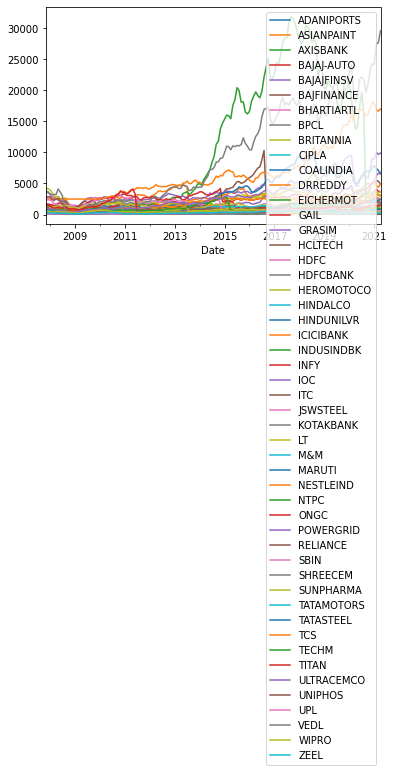

In [21]:
#Checking for stationarity
stocks_dfm.plot()

By looking plots of every stocks we can tell that these are not stationary time series.Hence we have to convert it into stationary time series.

In [22]:
#Visualising the data
stocks_dfm1=stocks_dfm.reset_index()#For plotting with time
import plotly.express as px
for i in stocks_dfm.columns: 
    fig = px.line(stocks_dfm1, x='Date', y=i, title=i+' stocks')

    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")


            ])
        ) 
    )
    fig.show()

By looking at these visualisations too,we can tell that this is not stationary.That is the mean and standard deviation varying too much with respect to time.There are trends for every stock i.e upward trend or downward trend.

#Making series stationary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



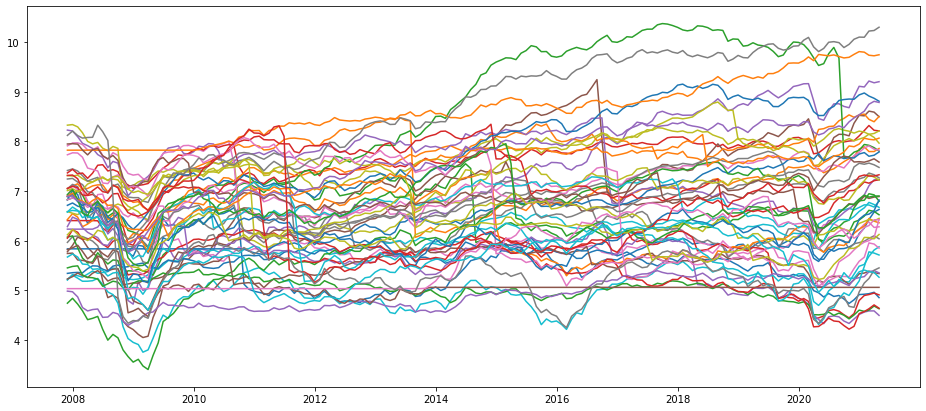

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

In [25]:
#Trying Log tranformation
'''plt.figure(figsize=(16,7))
fig=plt.figure(50)'''

for i in stocks_dfm.columns:
  plt.figure(figsize=(16,7))
  fig=plt.figure(1)
  stocks_log[i]=np.log(stocks_dfm[i])
  plt.plot(stocks_log[i])

In [26]:
stocks_dfm.columns

Index(['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV',
       'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA', 'COALINDIA',
       'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH', 'HDFC', 'HDFCBANK',
       'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR', 'ICICIBANK', 'INDUSINDBK',
       'INFY', 'IOC', 'ITC', 'JSWSTEEL', 'KOTAKBANK', 'LT', 'M&M', 'MARUTI',
       'NESTLEIND', 'NTPC', 'ONGC', 'POWERGRID', 'RELIANCE', 'SBIN',
       'SHREECEM', 'SUNPHARMA', 'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM',
       'TITAN', 'ULTRACEMCO', 'UNIPHOS', 'UPL', 'VEDL', 'WIPRO', 'ZEEL'],
      dtype='object')

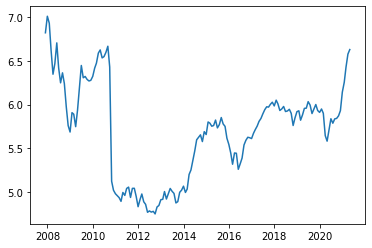

In [27]:
#Lets try plotting one stock
plt.plot(stocks_log['ADANIPORTS'])

So it is still not that stationary.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



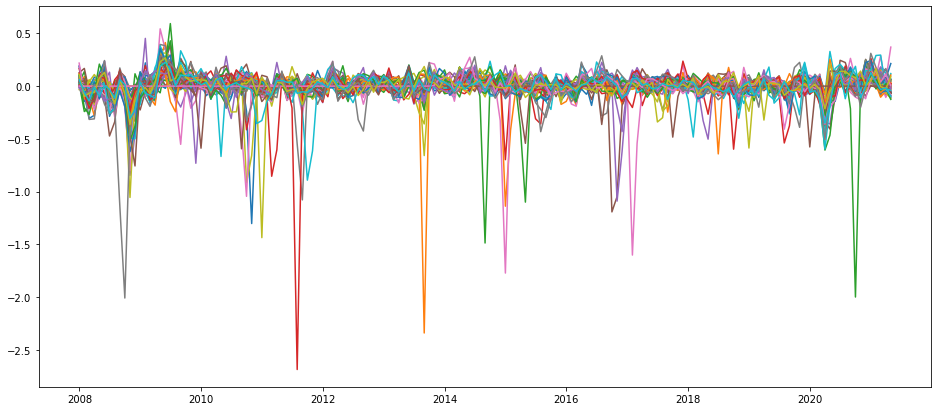

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

<Figure size 1152x504 with 0 Axes>

In [29]:
#Lets try differencing to make it stationary
for i in stocks_dfm.columns:
  plt.figure(figsize=(16,7))
  fig=plt.figure(1)
  stocks_log_diff[i]=stocks_log[i]-stocks_log[i].shift()
  plt.plot(stocks_log_diff[i])

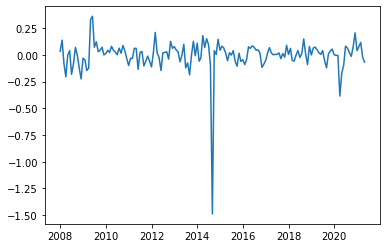

In [30]:
#Lets plot one stock and check stationarity
plt.plot(stocks_log_diff['AXISBANK'])

So now we can observe that its more or less stationary i.e it fluctuates around constant mean.

#Splittig the data

In [31]:
stocks_log_diff.head()

Date
2007-11-30 00:00:00         NaN
2007-12-31 00:00:00    0.188682
2008-01-31 00:00:00   -0.079133
2008-02-29 00:00:00   -0.306054
2008-03-31 00:00:00   -0.276491
Name: ADANIPORTS, dtype: object

In [32]:
'''train = stocks_log_diff[( stocks_log_diff.index.get_level_values(0) >='2007-11-30' ) &(stocks_log_diff.index.get_level_values(0) <='2019-12-31' )]
test = stocks_log_diff[(stocks_log_diff.index.get_level_values(0) >'2019-12-31' )]'''

#Tried Stationary data ,there was no significant improvement in accuracy,so took original data itself

"train = stocks_log_diff[( stocks_log_diff.index.get_level_values(0) >='2007-11-30' ) &(stocks_log_diff.index.get_level_values(0) <='2019-12-31' )]\ntest = stocks_log_diff[(stocks_log_diff.index.get_level_values(0) >'2019-12-31' )]"

In [33]:
stocks_dfm.head()

ADANIPORTS   ASIANPAINT     AXISBANK  BAJAJ-AUTO  BAJAJFINSV  \
Date                                                                        
2007-11-30   915.637500   998.175000   921.825000      604.75       509.1   
2007-12-31  1105.776316  1020.505263   953.365789      604.75       509.1   
2008-01-31  1021.645652  1117.910870  1094.467391      604.75       509.1   
2008-02-29   752.285714  1146.852381  1012.245238      604.75       509.1   
2008-03-31   570.563889  1154.558333   823.638889      604.75       509.1   

            BAJFINANCE  BHARTIARTL        BPCL    BRITANNIA       CIPLA  ...  \
Date                                                                     ...   
2007-11-30  322.987500  920.037500  390.012500  1496.262500  182.887500  ...   
2007-12-31  367.136842  956.321053  437.876316  1482.171053  204.294737  ...   
2008-01-31  434.319565  902.002174  443.797826  1508.534783  199.502174  ...   
2008-02-29  414.445238  871.285714  438.371429  1407.071429  193.950000  ...   
2008-03-31  353.163889  788.833333  420.777778  1334.166667  206.066667  ...   

             TATASTEEL          TCS        TECHM        TITAN  ULTRACEMCO  \
Date                                                                        
2007-11-30  822.412500   987.675000  1022.075000  1499.875000  987.712500   
2007-12-31  862.110526  1051.802632  1129.710526  1512.494737  988.634211   
2008-01-31  808.417391   931.245652   920.673913  1403.495652  902.836957   
2008-02-29  789.688095   894.995238   703.571429  1138.902381  876.923810   
2008-03-31  712.333333   834.813889   666.294444  1015.261111  827.036111   

               UNIPHOS    UPL         VEDL       WIPRO        ZEEL  
Date                                                                
2007-11-30  337.237500  153.8  3357.700000  454.075000  290.375000  
2007-12-31  349.576316  153.8  3665.081579  506.431579  308.852632  
2008-01-31  368.506522  153.8  3346.567391  459.002174  290.519565  
2008-02-29  325.654762  153.8  3181.347619  429.380952  252.266667  
2008-03-31  280.080556  153.8  3221.211111  404.766667  250.122222  

[5 rows x 50 columns]

In [34]:
train = stocks_dfm[( stocks_dfm.index.get_level_values(0) >='2007-11-30' ) &(stocks_dfm.index.get_level_values(0) <='2019-12-31' )]
test = stocks_dfm[(stocks_dfm.index.get_level_values(0) >'2019-12-31' )]

In [35]:
len(test)

16

#ARIMA

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1622.971, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1618.922, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1607.045, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1621.468, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1605.178, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1607.042, Time=0.38 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1603.678, Time=0.21 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1605.409, Time=0.52 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1605.416, Time=0.58 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1616.951, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=1598.393, Time=0.32 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept

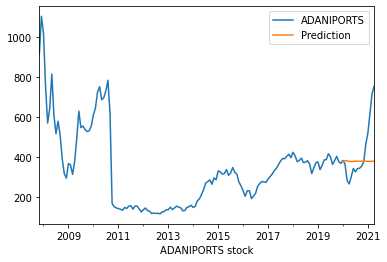

Results of sklearn.metrics:
MAE: 105.02265700821489
RMSE: 153.43306117118962
R-Squared: -0.08858776660436551
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2120.838, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2116.847, Time=0.21 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2120.575, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2120.654, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2114.879, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2118.838, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2118.838, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2118.585, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2118.609, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2120.388, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.064 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


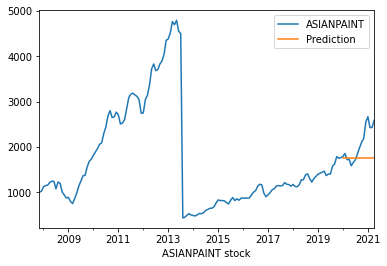

Results of sklearn.metrics:
MAE: 340.65240895438944
RMSE: 461.7101397284864
R-Squared: -0.6489333763227332
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1838.506, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1836.910, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1835.747, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1836.519, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1836.242, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1836.746, Time=0.66 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1836.136, Time=0.24 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1837.848, Time=0.18 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1837.516, Time=0.42 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1837.113, Time=0.3

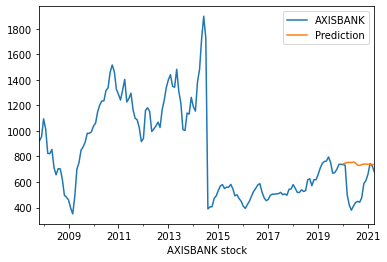

Results of sklearn.metrics:
MAE: 181.18984632142877
RMSE: 225.0722581445793
R-Squared: -1.9271035147927722
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1844.905, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1840.959, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1840.108, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1845.364, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1842.198, Time=0.35 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1842.022, Time=0.64 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1840.272, Time=0.40 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=2.37 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1843.161, Time=0.17 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1842.007, Time=0.62 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1841.934, Time=0.3

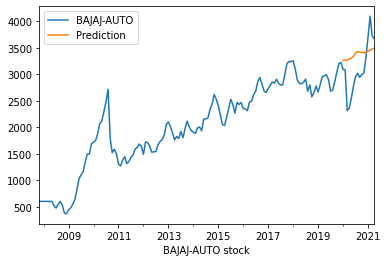

Results of sklearn.metrics:
MAE: 444.0847700598987
RMSE: 512.7731755049878
R-Squared: -0.12215282482695011
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1994.490, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1990.490, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1974.460, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1959.840, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1998.126, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1957.841, Time=0.16 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1959.840, Time=0.65 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1959.469, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1959.180, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1972.506, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1958.548, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1960.825

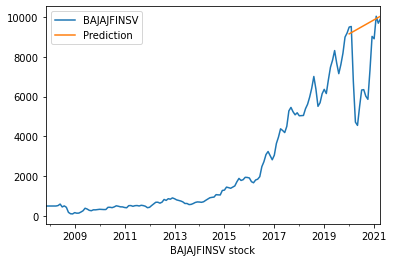

Results of sklearn.metrics:
MAE: 2188.2285029629024
RMSE: 2759.844153091861
R-Squared: -1.1094063289751857
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2301.724, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2297.985, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2299.110, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2298.104, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2296.210, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2299.750, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2299.764, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2297.331, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2296.366, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2296.771, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 0.987 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


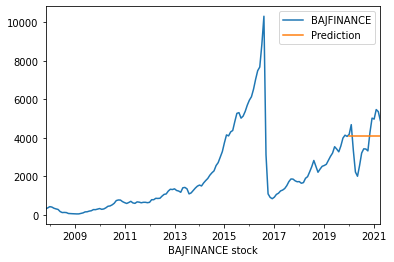

Results of sklearn.metrics:
MAE: 958.4758447259658
RMSE: 1091.2420698753274
R-Squared: -0.02664073608614803
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1491.994, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1488.161, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1487.705, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1487.210, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1487.100, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1489.995, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1489.993, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1485.749, Time=0.23 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1487.704, Time=0.38 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1489.702, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1486.550, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1487.227, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=14

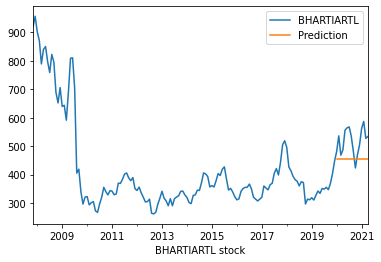

Results of sklearn.metrics:
MAE: 66.3975734268964
RMSE: 76.44183510430933
R-Squared: -1.994299845819505
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1571.594, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1569.704, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1561.238, Time=0.59 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1556.535, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1567.729, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1554.892, Time=0.13 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1556.555, Time=0.31 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1558.488, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1556.381, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1556.151, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1559.644, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1552.910, T

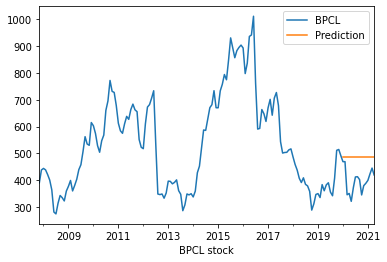

Results of sklearn.metrics:
MAE: 88.8886446458808
RMSE: 98.44668412650337
R-Squared: -4.412696533447619
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2048.397, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2044.464, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2045.747, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2046.288, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2042.689, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=2046.453, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2046.454, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2043.770, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2044.303, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2043.859, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.239 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


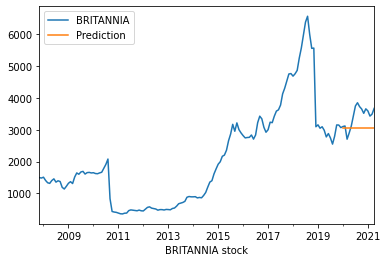

Results of sklearn.metrics:
MAE: 418.54417184987324
RMSE: 478.18687955973047
R-Squared: -1.1806025894282905
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1353.294, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1351.165, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1349.746, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1349.919, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1350.029, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1347.845, Time=0.07 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1349.775, Time=0.31 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1350.236, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1349.830, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1349.836, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1347.994, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=1346.44

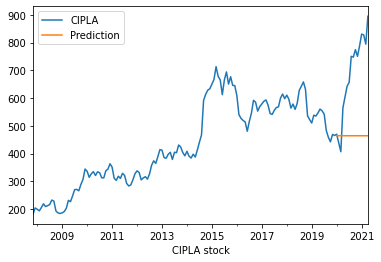

Results of sklearn.metrics:
MAE: 229.83026745353283
RMSE: 262.9543945242113
R-Squared: -2.283858663922886
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1208.935, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1207.176, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1200.327, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1194.176, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1205.790, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1192.480, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1194.225, Time=0.30 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1188.654, Time=0.15 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1190.383, Time=0.39 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1190.319, Time=0.37 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1191.023, Time=0.74 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1198.934,

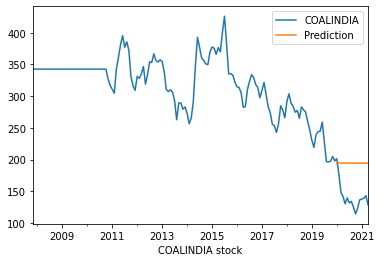

Results of sklearn.metrics:
MAE: 54.77679269577296
RMSE: 57.5943006311843
R-Squared: -6.905415911788493
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1867.709, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1864.005, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1867.659, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1867.646, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1863.608, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1865.755, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1865.739, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1865.881, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1865.879, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1867.908, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.192 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


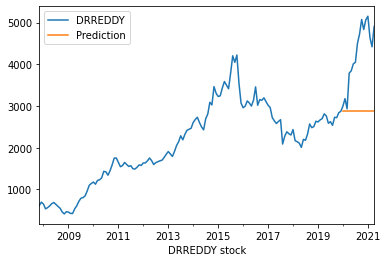

Results of sklearn.metrics:
MAE: 1383.5266241397094
RMSE: 1560.498700808913
R-Squared: -3.673912031355596
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2423.834, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2420.439, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2416.608, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2414.837, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2421.523, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2413.127, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2414.931, Time=0.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2416.310, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2414.452, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2414.560, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2414.683, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2416.525, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2413

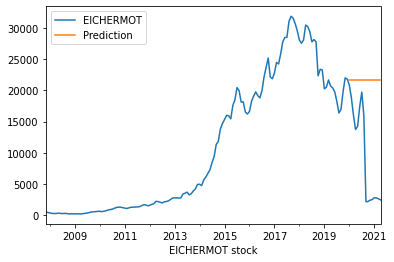

Results of sklearn.metrics:
MAE: 11849.392957619519
RMSE: 14020.390802945294
R-Squared: -2.500000025924572
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1405.030, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1401.205, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1398.109, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1394.048, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1399.921, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1392.223, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1394.040, Time=0.30 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1396.020, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1391.281, Time=0.17 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1392.813, Time=0.40 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1392.809, Time=0.41 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1394.808, Time=1.28 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=139

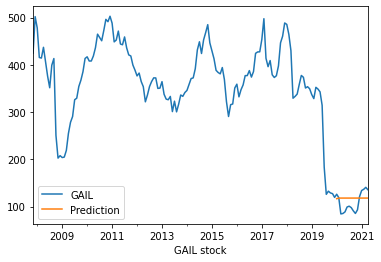

Results of sklearn.metrics:
MAE: 20.30912757087747
RMSE: 22.431901634880674
R-Squared: -0.2118361185609896
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2095.704, Time=1.00 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2093.316, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2088.758, Time=0.46 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2089.006, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2091.890, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2088.025, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2088.922, Time=0.10 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2090.452, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=2089.770, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2089.893, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2088.059, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=2088.552, Time=0.66 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=208

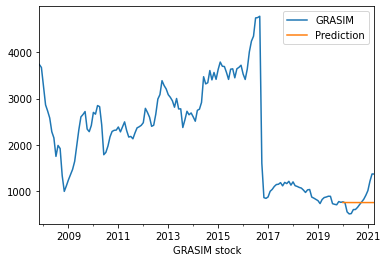

Results of sklearn.metrics:
MAE: 209.13609894198288
RMSE: 283.2945965920732
R-Squared: -0.05825305471289011
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1730.712, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1728.608, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1728.973, Time=0.52 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1726.735, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1726.694, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1728.754, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1728.712, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1728.206, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1725.406, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1726.764, Time=0.25 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1728.723, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1712.389, Time=0.20 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=17

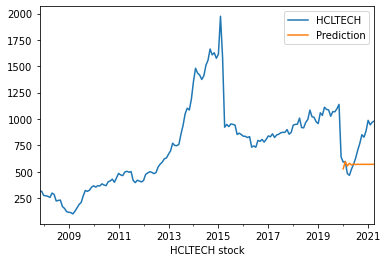

Results of sklearn.metrics:
MAE: 196.71023282952456
RMSE: 246.90537545352072
R-Squared: -0.8424259000117365
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1911.029, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1908.109, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1890.148, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1865.311, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1906.138, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1864.045, Time=0.23 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1865.476, Time=0.58 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1866.459, Time=1.11 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1864.813, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1864.506, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1888.230, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1866.243, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=18

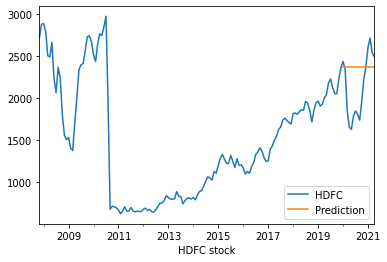

Results of sklearn.metrics:
MAE: 364.5845960646411
RMSE: 442.3545597823199
R-Squared: -0.4717911017076999
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1868.627, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1865.005, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1839.771, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1823.432, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1863.052, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1821.456, Time=0.14 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1823.429, Time=0.38 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1821.516, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1821.920, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1837.767, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1822.961, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1819.494,

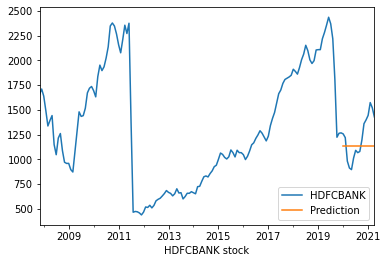

Results of sklearn.metrics:
MAE: 192.47147429726988
RMSE: 225.59746076927317
R-Squared: -0.12796025904848896
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1825.201, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1823.773, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1824.001, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1824.260, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1822.917, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1823.618, Time=0.24 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1823.907, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1824.582, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1824.461, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1822.166, Time=0.25 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1822.008, Time=0.70 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=1822.773, Time=1.70 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1

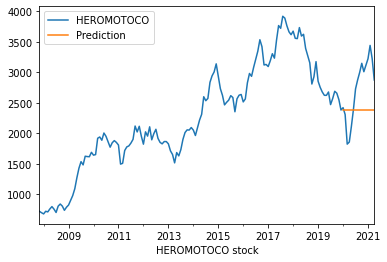

Results of sklearn.metrics:
MAE: 517.8131092740056
RMSE: 596.6940744724449
R-Squared: -0.4787669042967646
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1157.904, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1161.531, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1152.684, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1151.034, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1159.551, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1152.230, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1149.923, Time=0.39 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1152.137, Time=0.26 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1150.957, Time=1.00 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1149.921, Time=0.87 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1148.396, Time=0.65 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1155.478, Time=0.40 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=1151

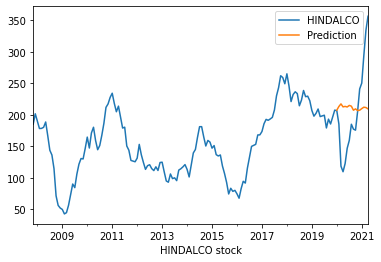

Results of sklearn.metrics:
MAE: 60.16174820641697
RMSE: 73.2457479945288
R-Squared: -0.04409313887063537
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1506.989, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1503.772, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1499.667, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1498.612, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1513.249, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1498.368, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1498.618, Time=0.31 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1500.608, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1500.368, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1500.368, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1499.551, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1495.324, Time=0.31 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1494

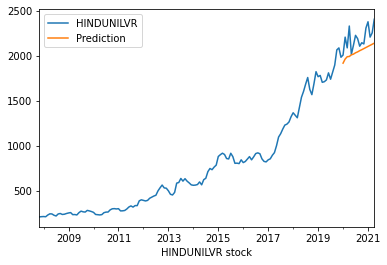

Results of sklearn.metrics:
MAE: 147.9049851952932
RMSE: 174.70660520968016
R-Squared: -1.2926597597996738
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1801.545, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1798.069, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1800.667, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1800.524, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1796.257, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1799.859, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1799.818, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1798.841, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1798.729, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1800.619, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.570 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


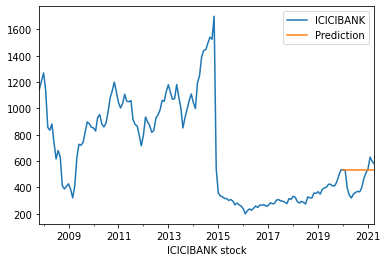

Results of sklearn.metrics:
MAE: 104.64327203569692
RMSE: 127.425213355348
R-Squared: -0.6096998783846388
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1568.365, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1566.062, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1560.119, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1556.053, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1568.698, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1556.423, Time=0.13 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1557.897, Time=0.38 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1557.523, Time=0.95 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1555.904, Time=0.20 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1557.887, Time=0.47 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1559.816, Time=1.57 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1566.369, Time=0.26 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1551

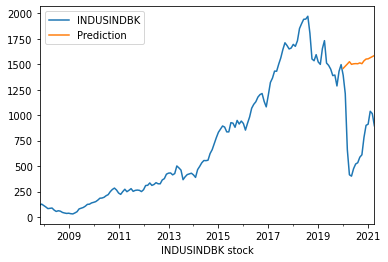

Results of sklearn.metrics:
MAE: 750.7604924115568
RMSE: 803.1596861363964
R-Squared: -6.909143943348796
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1997.082, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1993.664, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1997.143, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1997.084, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1991.759, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1995.257, Time=0.17 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1995.223, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1995.551, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1995.519, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1996.712, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.631 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


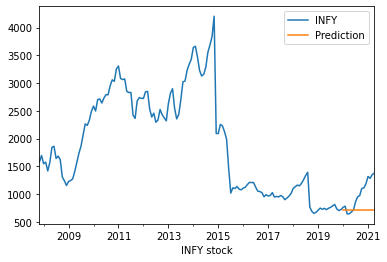

Results of sklearn.metrics:
MAE: 288.1957891243879
RMSE: 368.19757943997166
R-Squared: -1.0315245763443133
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1509.304, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1506.870, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1501.509, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1507.915, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1499.660, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1501.519, Time=0.34 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1503.197, Time=1.51 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1500.201, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1498.283, Time=0.19 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1500.133, Time=0.44 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1500.126, Time=0.51 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=1501.862

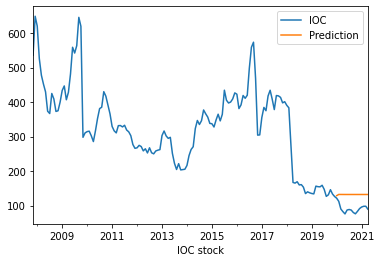

Results of sklearn.metrics:
MAE: 40.86869669197236
RMSE: 42.69505588074325
R-Squared: -12.032084729419287
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1279.715, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1278.534, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1278.763, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1278.079, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1276.586, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1278.741, Time=0.20 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1278.333, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1278.477, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1278.151, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1279.798, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.723 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


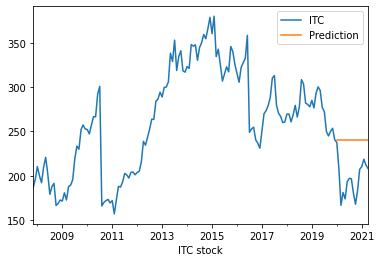

Results of sklearn.metrics:
MAE: 44.108777903978506
RMSE: 48.09833028755523
R-Squared: -5.288852762140257
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1846.956, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1844.054, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1842.723, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1842.793, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1842.242, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1845.104, Time=0.19 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1845.086, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1841.131, Time=0.12 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1842.686, Time=0.40 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1844.203, Time=0.69 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1843.105, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1843.083, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1841

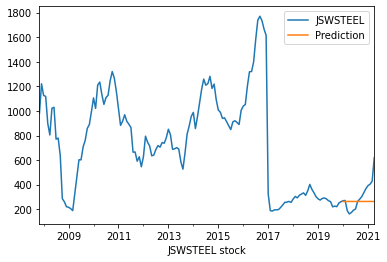

Results of sklearn.metrics:
MAE: 89.83960162317507
RMSE: 122.92266123702315
R-Squared: -0.11941141401367728
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1677.819, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1659.519, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1655.963, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1676.149, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1654.903, Time=0.14 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1655.891, Time=0.30 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1657.872, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1656.870, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1656.858, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1659.434, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1657.223, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1653.15

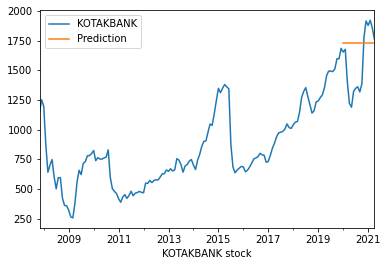

Results of sklearn.metrics:
MAE: 259.530181635417
RMSE: 307.23152612106156
R-Squared: -0.41430230948695
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2254.510, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2267.019, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1962.768, Time=0.72 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2111.036, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2578.696, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1960.867, Time=0.13 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1962.745, Time=0.55 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1953.461, Time=0.26 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1955.453, Time=1.06 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1955.451, Time=0.67 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=1954.693, Time=1

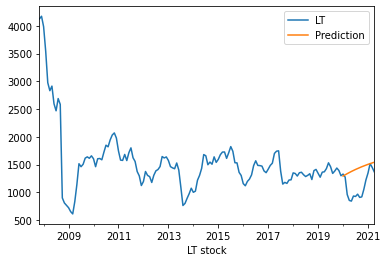

Results of sklearn.metrics:
MAE: 317.47638057269774
RMSE: 374.1719806716187
R-Squared: -1.7357601080260263
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1694.376, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1693.109, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1689.740, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1690.336, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1691.148, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1689.863, Time=0.07 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1690.598, Time=0.94 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1691.039, Time=0.45 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1690.048, Time=0.24 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1692.100, Time=1.58 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1693.134, Time=0.16 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1691.738, Time=0.30 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=169

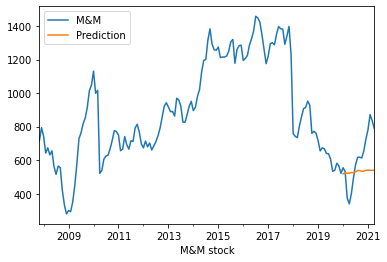

Results of sklearn.metrics:
MAE: 140.10699026890796
RMSE: 170.04256533301236
R-Squared: -0.17275327814790264
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2035.205, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2022.450, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2015.489, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2036.882, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2015.177, Time=0.16 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2016.046, Time=0.44 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2016.862, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2016.635, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2022.616, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2018.317, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2015.273, T

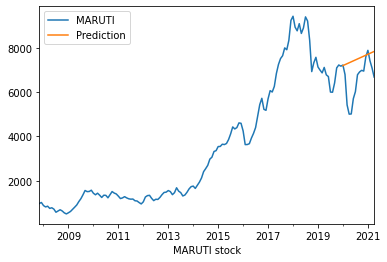

Results of sklearn.metrics:
MAE: 949.3560862627528
RMSE: 1203.9566059425908
R-Squared: -0.9458706819948899
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2079.447, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2081.564, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2075.502, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2076.196, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2089.218, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2080.417, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=2077.098, Time=1.28 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2077.272, Time=0.43 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=2075.352, Time=0.28 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=2077.210, Time=0.77 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2079.222, Time=1.09 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2077.532, Time=0.16 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=207

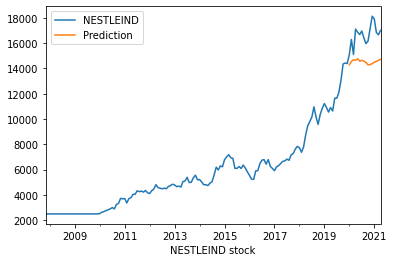

Results of sklearn.metrics:
MAE: 2111.9242070272703
RMSE: 2261.296490908065
R-Squared: -6.941600828003175
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1049.277, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1045.371, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1048.838, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1048.349, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1044.628, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1047.311, Time=0.11 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1047.316, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1046.860, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1046.360, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1046.147, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.467 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


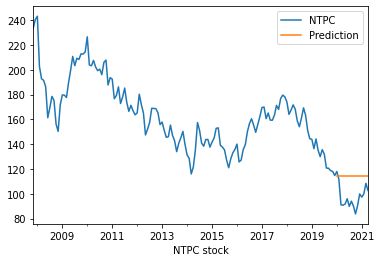

Results of sklearn.metrics:
MAE: 17.90281170647304
RMSE: 19.61872402579189
R-Squared: -3.8825394539048803
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1665.447, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1662.744, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1642.313, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1636.271, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1662.082, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1634.289, Time=0.13 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1636.271, Time=0.37 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1637.812, Time=0.79 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1636.113, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1636.060, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1640.341, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1637.500, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1633

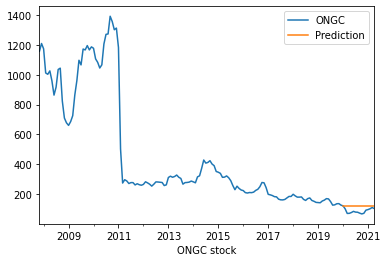

Results of sklearn.metrics:
MAE: 34.24027257952002
RMSE: 37.81657668818845
R-Squared: -4.549510971000029
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=954.532, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=956.341, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=951.111, Time=0.23 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=948.118, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=954.616, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=949.926, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=950.051, Time=0.55 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=950.112, Time=0.57 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=948.157, Time=0.20 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=952.088, Time=1.26 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=952.806, Time=0.13 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=947.684, Time=0.50 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.19 se

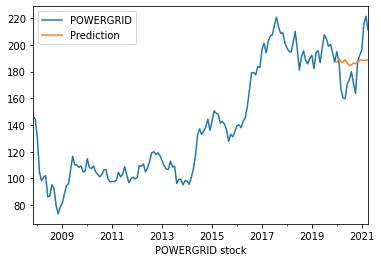

Results of sklearn.metrics:
MAE: 15.560177605198634
RMSE: 18.623819021406824
R-Squared: 0.04264345181054019
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2186.057, Time=1.07 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2215.094, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1860.747, Time=1.58 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2502.311, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1858.765, Time=0.37 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1860.747, Time=0.48 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1850.492, Time=0.21 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1852.480, Time=0.90 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1852.480, Time=0.60 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.92 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=1846.342, Time=0.

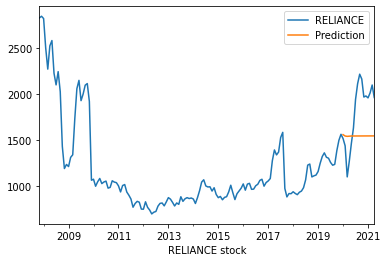

Results of sklearn.metrics:
MAE: 373.37552048585525
RMSE: 420.4607277052353
R-Squared: -0.5885604007980185
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1948.895, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1944.873, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1930.180, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1924.727, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1943.557, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1922.799, Time=0.14 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1924.741, Time=0.43 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1926.335, Time=0.78 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1924.783, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1924.778, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1928.205, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1921.205

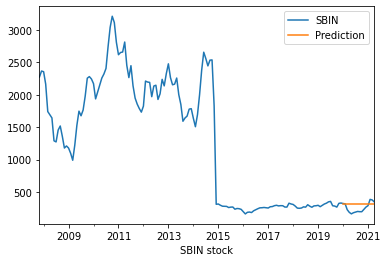

Results of sklearn.metrics:
MAE: 83.9436626832725
RMSE: 97.15855517922354
R-Squared: -0.77729336657104
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2288.035, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2285.683, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2282.684, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2276.705, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2289.771, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2275.248, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2276.817, Time=0.29 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2278.675, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2272.113, Time=0.27 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=2274.230, Time=0.48 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2274.202, Time=0.46 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2275.929, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2281.18

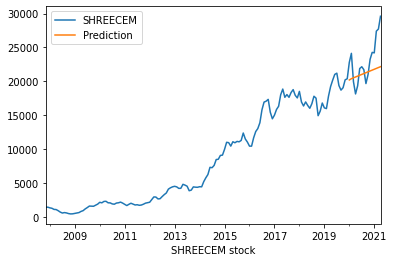

Results of sklearn.metrics:
MAE: 2562.0206032013884
RMSE: 3246.708912811358
R-Squared: -0.08704073279912339
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1853.466, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1856.144, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1855.882, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1851.621, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1855.063, Time=0.06 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1855.096, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1854.468, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1854.168, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1854.823, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 1.613 seconds
AxesSubplot(0.125,0.125;0.775x0.755)


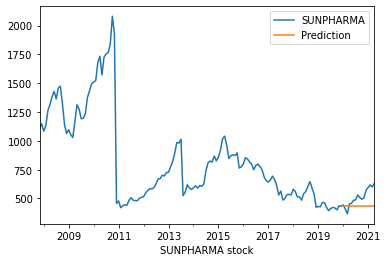

Results of sklearn.metrics:
MAE: 88.79901232154411
RMSE: 107.62875975679425
R-Squared: -1.0888684142187666
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1629.281, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1630.634, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1603.286, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1593.240, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1629.114, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1591.286, Time=0.14 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1593.256, Time=0.34 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1593.286, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1593.286, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1601.438, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1594.221, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1589.541

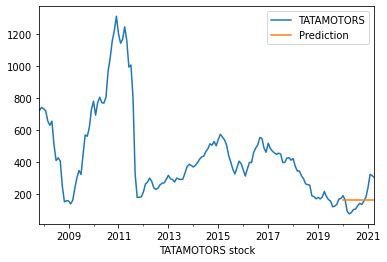

Results of sklearn.metrics:
MAE: 64.00219938046943
RMSE: 80.76393879579646
R-Squared: -0.010072549032188682
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1884.351, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1555.267, Time=0.53 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1717.061, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2225.696, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1555.523, Time=0.12 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1545.107, Time=1.36 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=1546.907, Time=2.18 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1550.041, Time=0.77 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1880.944, Time=1.96 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1535.032, Time=1.75 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1541.597, Time=0.69 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=1536.30

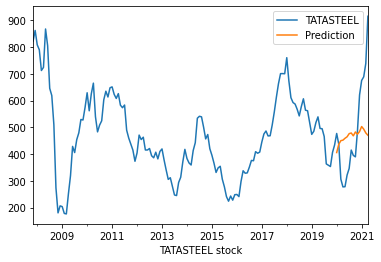

Results of sklearn.metrics:
MAE: 143.57164090844444
RMSE: 176.19072564980277
R-Squared: 0.07026847813615078
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1891.612, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1888.604, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1889.184, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1888.380, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1886.951, Time=0.02 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1890.292, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1890.249, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1887.360, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1886.558, Time=0.14 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1888.399, Time=0.40 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1889.691, Time=0.82 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1887.733, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=18

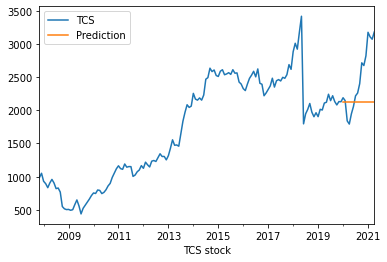

Results of sklearn.metrics:
MAE: 455.6121589534953
RMSE: 586.3027473797807
R-Squared: -0.5348517424930905
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1879.386, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1875.543, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1853.492, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1843.712, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1873.562, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1841.728, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1843.717, Time=0.25 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1845.509, Time=0.54 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1843.650, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1843.633, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1851.495, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1845.630, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1839

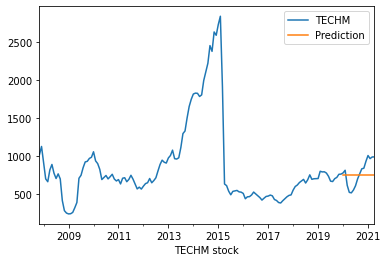

Results of sklearn.metrics:
MAE: 148.98902686772414
RMSE: 169.94642271176332
R-Squared: -0.021539143261047444
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2056.296, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2053.651, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2047.783, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2046.744, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2051.660, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2045.897, Time=0.10 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2046.794, Time=0.28 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2048.722, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2047.915, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2047.834, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=2046.730, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=2043.

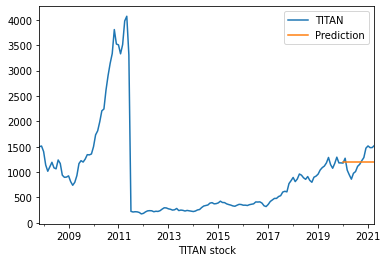

Results of sklearn.metrics:
MAE: 186.49126310093416
RMSE: 218.0562438909086
R-Squared: -0.020206189860461965
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1867.234, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1872.415, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1864.454, Time=0.41 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1864.568, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1873.276, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1871.428, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=1866.416, Time=1.04 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=1866.425, Time=0.69 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1865.263, Time=0.28 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=1868.379, Time=0.93 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1865.269, Time=0.27 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=1863.117, Time=0.54 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=1

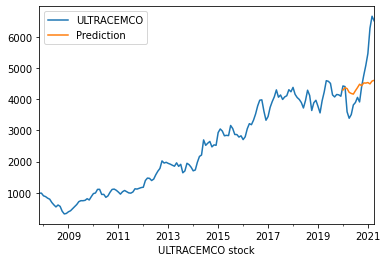

Results of sklearn.metrics:
MAE: 723.369966385261
RMSE: 962.7644544267763
R-Squared: 0.14746078314624722
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1557.076, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1255.016, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1386.570, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1919.209, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1256.739, Time=0.12 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1256.949, Time=2.11 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1256.808, Time=0.76 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1254.811, Time=0.30 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1256.809, Time=0.86 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1547.112, Time=0.28 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1233.415, Time=

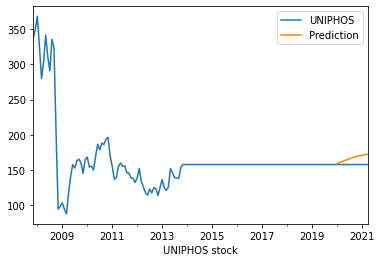

Results of sklearn.metrics:
MAE: 9.02352137955636
RMSE: 10.015718933057792
R-Squared: 0.0
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1488.256, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1486.290, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1482.110, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1479.845, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1485.028, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1478.240, Time=0.15 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1479.783, Time=0.28 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1481.173, Time=0.61 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1475.931, Time=0.17 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1477.478, Time=0.48 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1477.590, Time=0.58 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=1478.107, Time=0.73 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1480.594, Time=0.08 

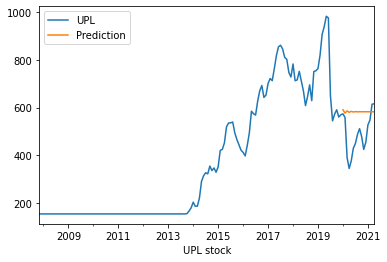

Results of sklearn.metrics:
MAE: 104.5369340096988
RMSE: 125.41150821244834
R-Squared: -1.4392515156883974
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2364.244, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2362.825, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1991.774, Time=0.40 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2209.858, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2397.691, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1990.191, Time=0.09 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1991.716, Time=0.29 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1993.715, Time=0.41 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1959.418, Time=0.14 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1961.402, Time=0.52 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=1961.398, Time=0.41 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=1963.400, Time=0.52 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=196

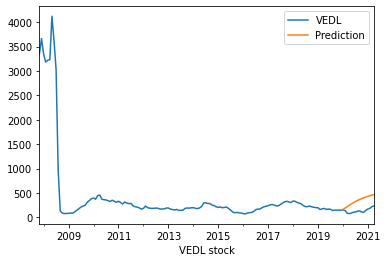

Results of sklearn.metrics:
MAE: 203.4656897369877
RMSE: 217.51169437708145
R-Squared: -21.393181666161784
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1471.525, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1467.599, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1457.413, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1455.584, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1465.813, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1453.599, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1455.586, Time=0.32 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1457.428, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1455.598, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1455.598, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1455.655, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1457.598, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=145

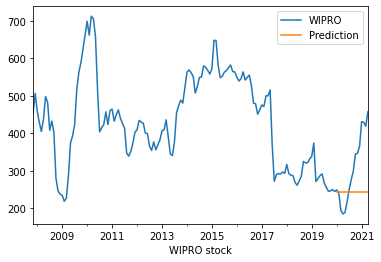

Results of sklearn.metrics:
MAE: 86.54182048911093
RMSE: 111.0559580906478
R-Squared: -0.47964588748477843
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1320.233, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1314.310, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1313.891, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1318.233, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1311.984, Time=0.13 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1313.903, Time=0.22 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1313.918, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1313.904, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1312.345, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1315.365, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1309.984, Tim

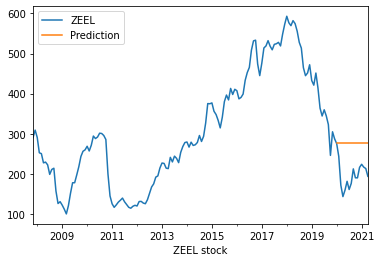

Results of sklearn.metrics:
MAE: 79.13359669834527
RMSE: 85.71318854479398
R-Squared: -5.773542600538558


In [36]:
import pmdarima as pm
import sklearn.metrics as metrics
for i in train.columns:
    model = pm.auto_arima(train[i], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)
    model.fit(train[i])
    forecast=model.predict(n_periods=16, return_conf_int=True)
    forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

    mae = metrics.mean_absolute_error(test[i], forecast_df)
    mse = metrics.mean_squared_error(test[i], forecast_df)
    rmse = np.sqrt(mse) #mse**(0.5)  
    r2 = metrics.r2_score(test[i],forecast_df['Prediction'])
    print(pd.concat([stocks_dfm[i],forecast_df],axis=1).plot())
    plt.plot(stocks_dfm[i])
    plt.plot(forecast_df)
    plt.xlabel(i+' stock')
    plt.show()

    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("RMSE:", rmse)
    print("R-Squared:", r2)


We have run the auto arima and found the best p,d,q values.And we have used those values and forecast the next time series.We can see the actual vs forecasted values in plots above

#FBProphet

In [37]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 134 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.4 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638691 sha256=b733daa5d99023aae7c5e59859ea469e21e15ba07893956fa50fe88791ba1c79
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


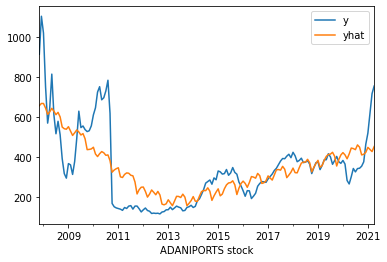

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 90.40325992047106
RMSE: 124.27264062624124
R-Squared: 0.5863350973577829


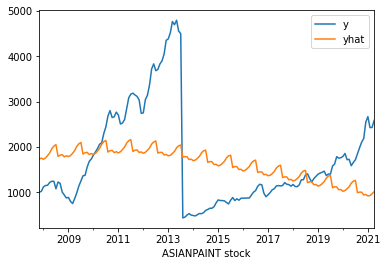

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 835.1634220002193
RMSE: 1041.7786901537743
R-Squared: 0.06605470437908789


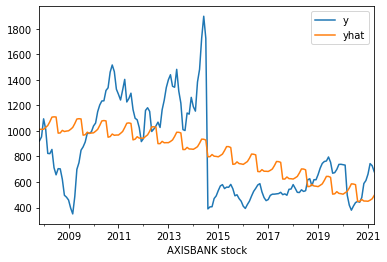

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 241.24835461241517
RMSE: 293.40874376286615
R-Squared: 0.30255329483319293


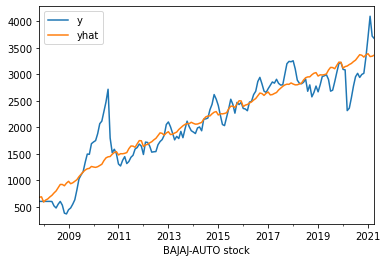

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 217.43441334807784
RMSE: 308.1637336630744
R-Squared: 0.8589551275549405


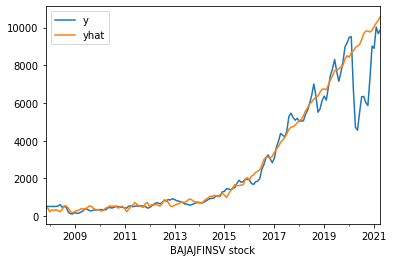

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 399.0139915043819
RMSE: 885.4156008233637
R-Squared: 0.902970018435416


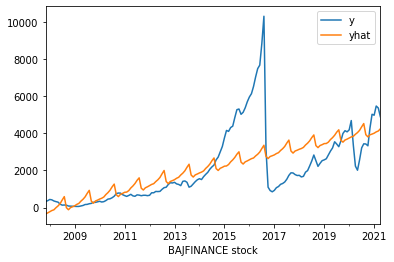

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 998.175747551037
RMSE: 1474.5449729494856
R-Squared: 0.4323494407458959


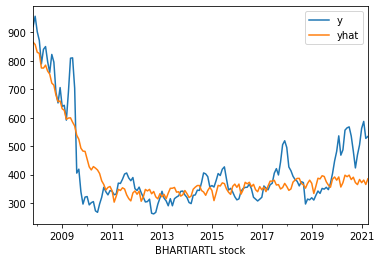

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 56.40947715356557
RMSE: 76.75926105356412
R-Squared: 0.7545606537933242


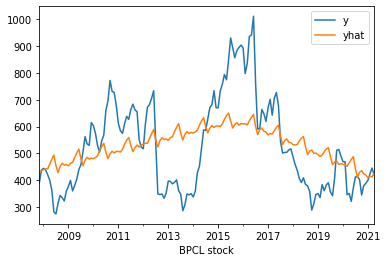

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 120.22877055328479
RMSE: 145.514959435999
R-Squared: 0.28845465726134956


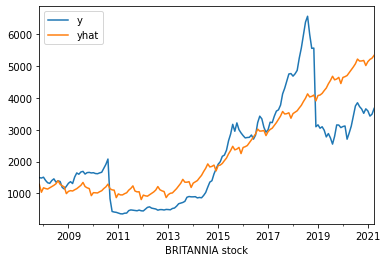

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 727.98384517783
RMSE: 915.8657251835061
R-Squared: 0.6171163143463932


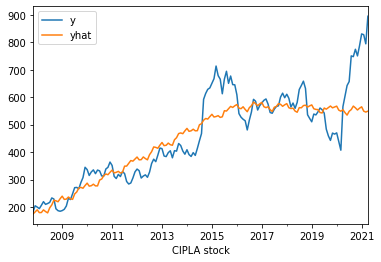

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 58.55060712366304
RMSE: 82.25232867713356
R-Squared: 0.7540308952034398


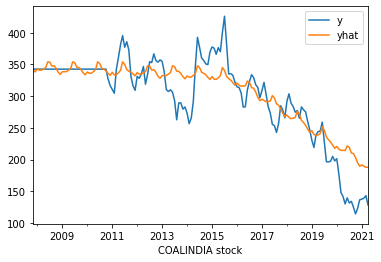

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 24.173944763721003
RMSE: 33.02669737370911
R-Squared: 0.7677476711704523


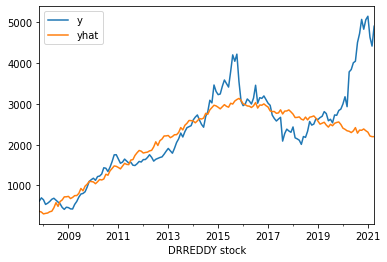

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 414.7975538852354
RMSE: 718.4271737893644
R-Squared: 0.5869969000792302


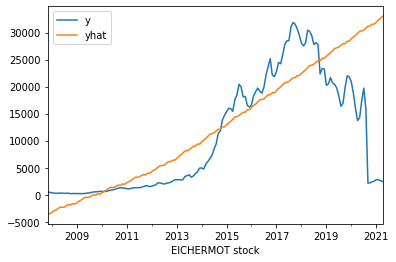

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 5207.099718005443
RMSE: 8211.605720589443
R-Squared: 0.37601866549239105


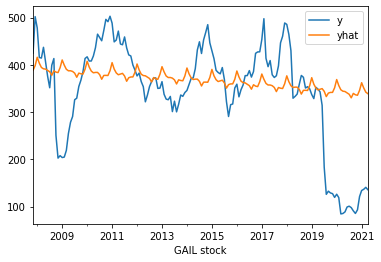

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 74.80100479958485
RMSE: 104.57614384112891
R-Squared: 0.08145663451870744


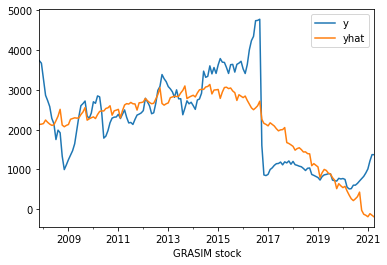

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 516.2592355234401
RMSE: 687.8024218185536
R-Squared: 0.5972234272441774


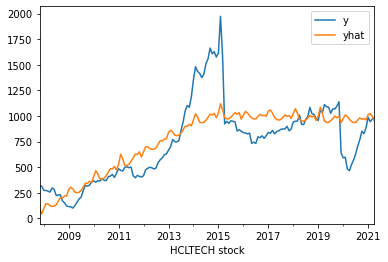

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 170.36331546200984
RMSE: 230.92414726156366
R-Squared: 0.634696349223133


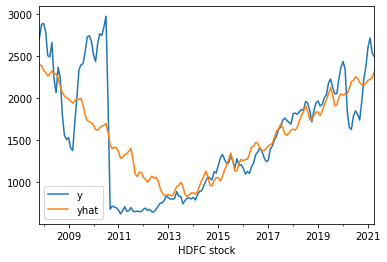

Results of sklearn.metrics:
MAE: 284.96098820463845
RMSE: 398.1999334772704
R-Squared: 0.6597073353435214


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


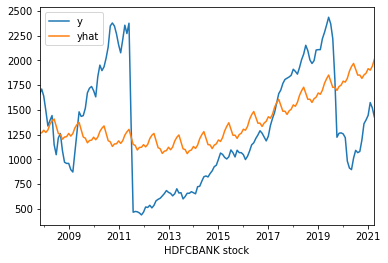

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 439.5278795281807
RMSE: 513.8430233662863
R-Squared: 0.14646609229933305


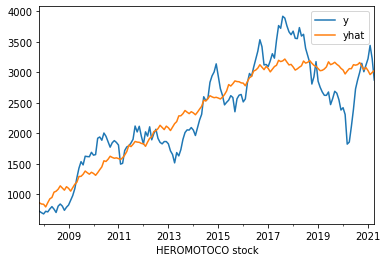

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 295.16198336222175
RMSE: 364.81222482392207
R-Squared: 0.8046133682608543


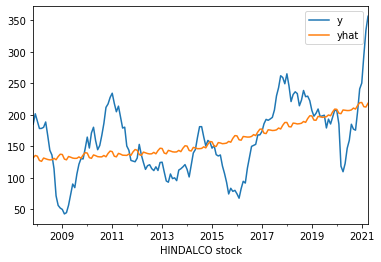

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 38.3707107795691
RMSE: 47.82180985696248
R-Squared: 0.2898802357982828


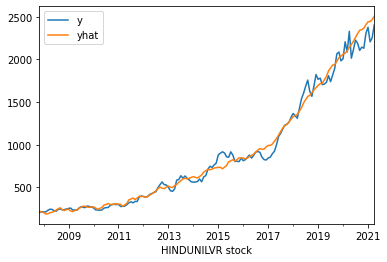

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 51.09472730151702
RMSE: 75.83344570780474
R-Squared: 0.9864787607561779


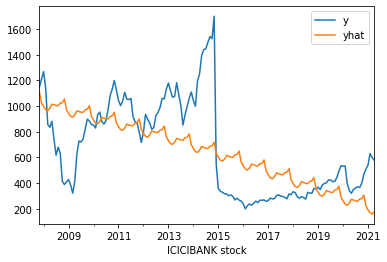

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 240.30305995044282
RMSE: 304.67561676075314
R-Squared: 0.31101656993723037


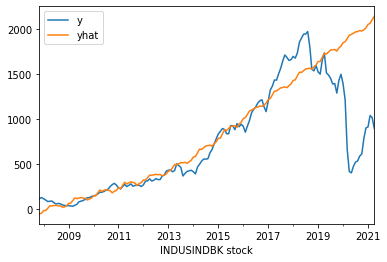

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 206.7929423629748
RMSE: 414.77621530976165
R-Squared: 0.4593531668462225


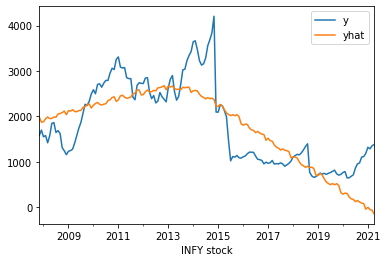

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 473.4207915045902
RMSE: 593.2110607767019
R-Squared: 0.5832789253232245


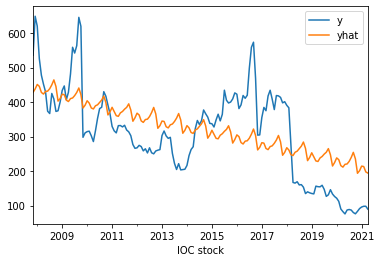

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 89.06499530209733
RMSE: 102.0394922852405
R-Squared: 0.40548551866880034


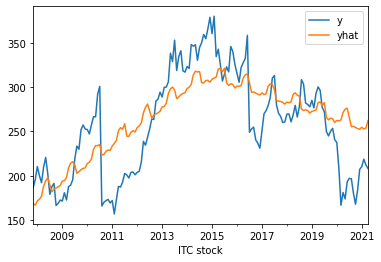

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 33.25575130071573
RMSE: 39.52313004093546
R-Squared: 0.5472817282890369


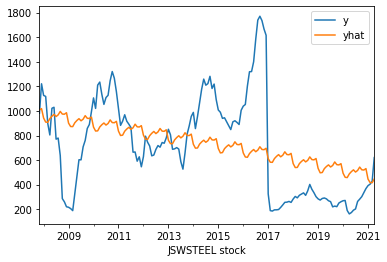

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 291.658253553315
RMSE: 360.77269700999784
R-Squared: 0.1897974377323547


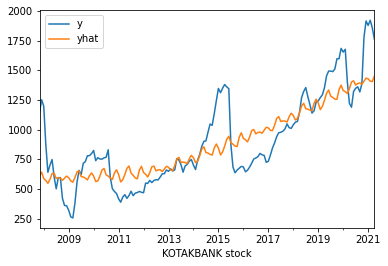

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 168.37556662972528
RMSE: 217.45915422930378
R-Squared: 0.680534433341058


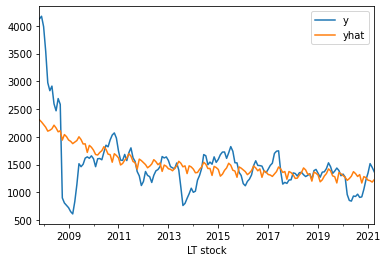

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 286.3213433371387
RMSE: 451.9473357568488
R-Squared: 0.3321762300433101


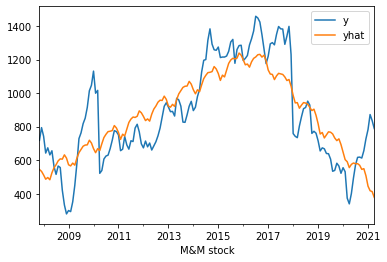

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 142.15139776782252
RMSE: 171.2030572801492
R-Squared: 0.6689214157230774


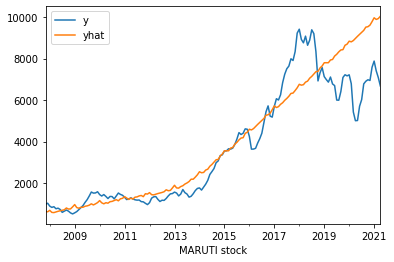

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 797.4873448582006
RMSE: 1216.1968873296828
R-Squared: 0.8049009549175363


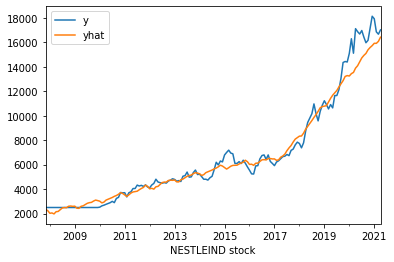

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 481.36486492040143
RMSE: 746.8582146014119
R-Squared: 0.9690868827857636


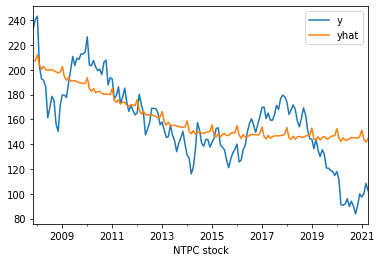

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 18.248378069876697
RMSE: 22.750744534359782
R-Squared: 0.5161434291593288


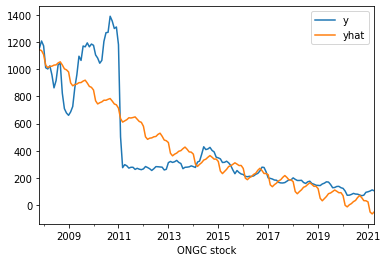

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 134.17630596918875
RMSE: 194.24588468649796
R-Squared: 0.73276166403482


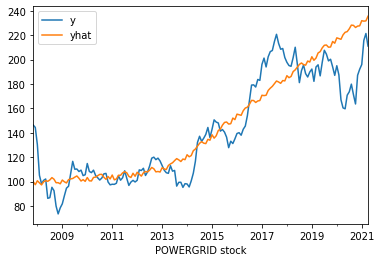

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 14.451468817661123
RMSE: 19.79830014858836
R-Squared: 0.7762097928384231


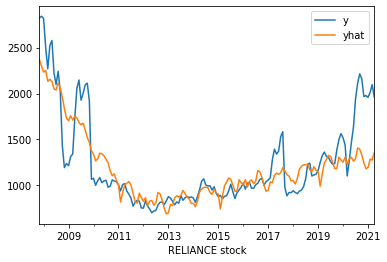

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 190.20838814732875
RMSE: 276.89110343668983
R-Squared: 0.6872872880008496


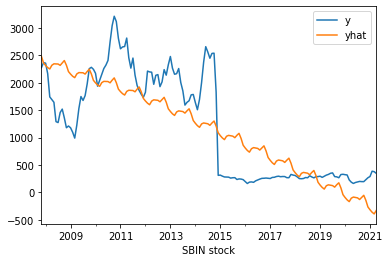

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 489.31967744273595
RMSE: 592.1912314484201
R-Squared: 0.6125007245754852


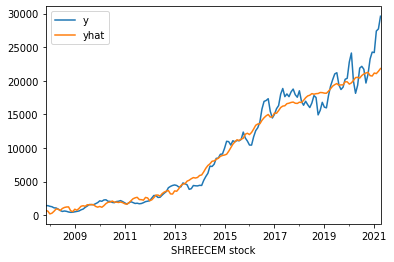

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 963.392696358547
RMSE: 1492.2841292530063
R-Squared: 0.9643441944973326


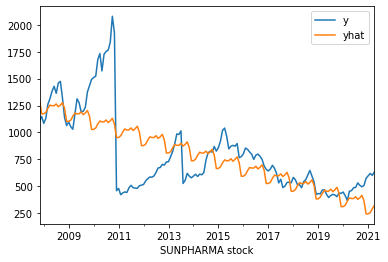

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 200.42495198976596
RMSE: 278.4424175736502
R-Squared: 0.4544762705754033


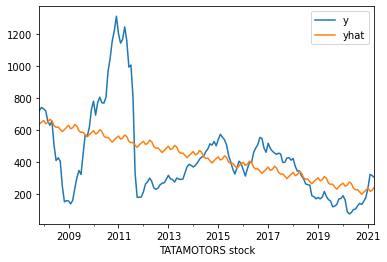

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 168.8900354723806
RMSE: 231.17547200781797
R-Squared: 0.2513088329817972


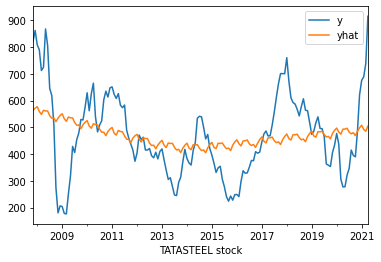

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 112.97816302150882
RMSE: 143.07700584325175
R-Squared: 0.14757333770347159


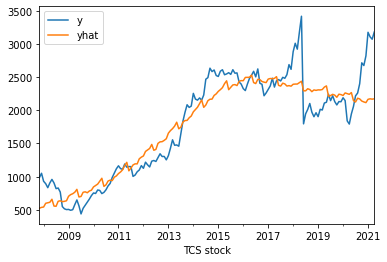

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 226.57616983158772
RMSE: 297.7752659843155
R-Squared: 0.8492021289470247


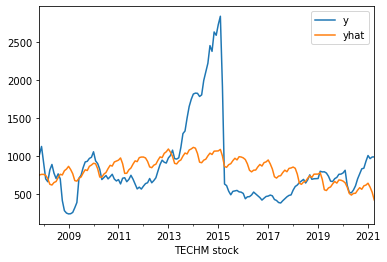

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 314.28656798828035
RMSE: 457.53368003724165
R-Squared: 0.17227639828293373


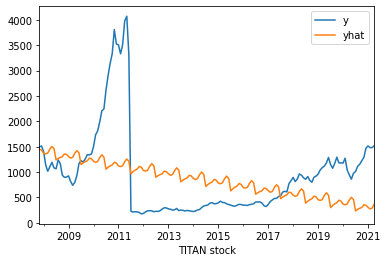

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 642.4992063158893
RMSE: 840.0125668419801
R-Squared: 0.013407152668270972


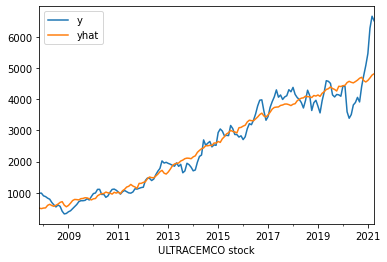

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 251.23096744946133
RMSE: 380.06789174671513
R-Squared: 0.9334337011218914


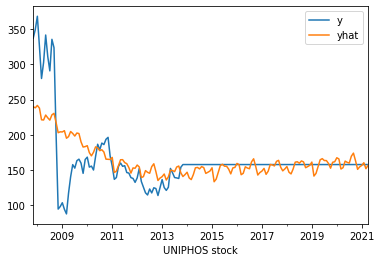

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 20.18062639334188
RMSE: 35.07565602143104
R-Squared: 0.4415090503372583


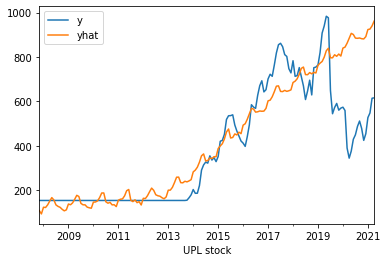

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 92.25557868671409
RMSE: 151.3951135753181
R-Squared: 0.628909949028368


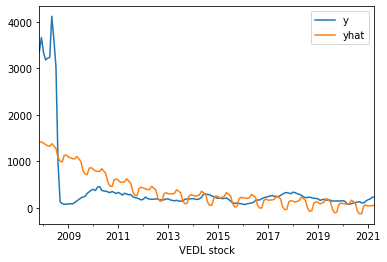

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 316.58679439157373
RMSE: 580.3399818298253
R-Squared: 0.39371222802923844


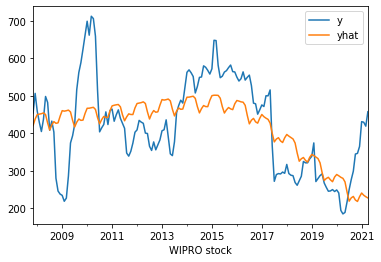

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Results of sklearn.metrics:
MAE: 78.0519111410189
RMSE: 97.32453161864667
R-Squared: 0.3726669317710861


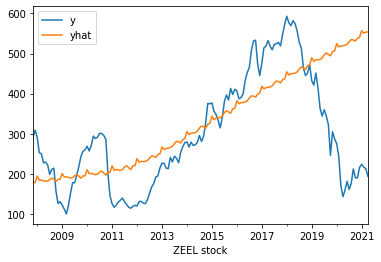

Results of sklearn.metrics:
MAE: 95.0078051342421
RMSE: 131.6989395884045
R-Squared: 0.0607833048230455


In [38]:
from fbprophet import Prophet
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

for i in stocks_dfm.columns:
    df1=stocks_dfm.reset_index()[['Date',i]].rename({'Date':'ds',i:'y'},  axis='columns')
    train = df1[( df1['ds'] >='2007-11-30' ) &(df1['ds'] <='2019-12-31' )]
    test = df1[(df1['ds'] >'2019-12-31' )]
    m = Prophet(interval_width=0.95,yearly_seasonality=True)
    m.fit(train)
    future = m.make_future_dataframe(periods=16,freq='M')
    forecast = m.predict(future)
    pd.concat([df1.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()
    mae = metrics.mean_absolute_error(df1.set_index('ds')['y'],forecast.set_index('ds')['yhat'])
    mse = metrics.mean_squared_error(df1.set_index('ds')['y'],forecast.set_index('ds')['yhat'])
    rmse = np.sqrt(mse) #mse**(0.5)  
    r2 = metrics.r2_score(df1.set_index('ds')['y'],forecast.set_index('ds')['yhat'])  
    plt.plot(df1.set_index('ds')['y'])
    plt.plot(forecast.set_index('ds')['yhat'])
    plt.xlabel(i+' stock')
    plt.show()
    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

#RNN

In [39]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN,LSTM

training_size=int(len(stocks_dfm)*0.8)
test_size=len(stocks_dfm)-training_size

In [40]:
print(training_size,test_size)

129 33


In [41]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
import numpy

Epoch 1/20
2/2 [==============================] - 4s 670ms/step - loss: 0.0311 - val_loss: 0.0192
Epoch 2/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0162 - val_loss: 0.0240
Epoch 3/20
2/2 [==============================] - 0s 32ms/step - loss: 0.0210 - val_loss: 0.0059
Epoch 4/20
2/2 [==============================] - 0s 33ms/step - loss: 0.0089 - val_loss: 0.0160
Epoch 5/20
2/2 [==============================] - 0s 33ms/step - loss: 0.0151 - val_loss: 0.0145
Epoch 6/20
2/2 [==============================] - 0s 32ms/step - loss: 0.0104 - val_loss: 0.0043
Epoch 7/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0081 - val_loss: 0.0078
Epoch 8/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0106 - val_loss: 0.0046
Epoch 9/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0068 - val_loss: 0.0055
Epoch 10/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0074 - val_loss: 0.0088
Epoch 11/20
2/2 [===========

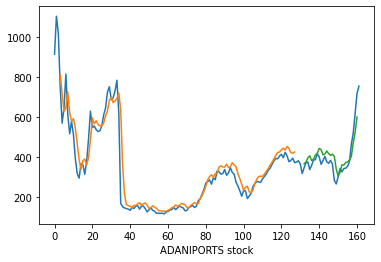

Epoch 1/20
2/2 [==============================] - 14s 3s/step - loss: 0.3228 - val_loss: 0.2808
Epoch 2/20
2/2 [==============================] - 0s 75ms/step - loss: 0.2790 - val_loss: 0.0917
Epoch 3/20
2/2 [==============================] - 0s 172ms/step - loss: 0.0696 - val_loss: 0.0259
Epoch 4/20
2/2 [==============================] - 0s 170ms/step - loss: 0.0807 - val_loss: 0.0865
Epoch 5/20
2/2 [==============================] - 0s 101ms/step - loss: 0.0955 - val_loss: 0.0327
Epoch 6/20
2/2 [==============================] - 0s 88ms/step - loss: 0.0371 - val_loss: 0.0024
Epoch 7/20
2/2 [==============================] - 0s 152ms/step - loss: 0.0219 - val_loss: 0.0233
Epoch 8/20
2/2 [==============================] - 0s 145ms/step - loss: 0.0360 - val_loss: 0.0419
Epoch 9/20
2/2 [==============================] - 0s 120ms/step - loss: 0.0441 - val_loss: 0.0371
Epoch 10/20
2/2 [==============================] - 0s 103ms/step - loss: 0.0377 - val_loss: 0.0191
Epoch 11/20
2/2 [======

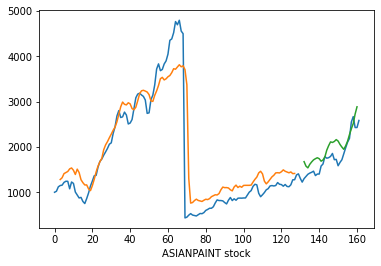

Epoch 1/20
2/2 [==============================] - 10s 1s/step - loss: 0.3066 - val_loss: 0.0444
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0828 - val_loss: 0.1565
Epoch 3/20
2/2 [==============================] - 0s 106ms/step - loss: 0.1575 - val_loss: 0.1096
Epoch 4/20
2/2 [==============================] - 0s 101ms/step - loss: 0.0757 - val_loss: 0.0371
Epoch 5/20
2/2 [==============================] - 0s 135ms/step - loss: 0.0370 - val_loss: 0.0092
Epoch 6/20
2/2 [==============================] - 0s 114ms/step - loss: 0.0654 - val_loss: 0.0054
Epoch 7/20
2/2 [==============================] - 0s 147ms/step - loss: 0.0643 - val_loss: 0.0072
Epoch 8/20
2/2 [==============================] - 0s 99ms/step - loss: 0.0364 - val_loss: 0.0132
Epoch 9/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0197 - val_loss: 0.0209
Epoch 10/20
2/2 [==============================] - 0s 96ms/step - loss: 0.0221 - val_loss: 0.0238
Epoch 11/20
2/2 [========

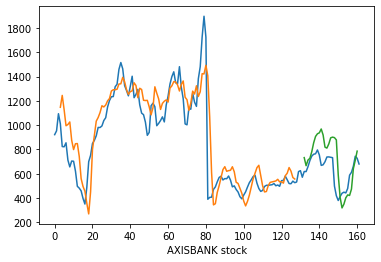

Epoch 1/20
2/2 [==============================] - 4s 619ms/step - loss: 0.1641 - val_loss: 0.1723
Epoch 2/20
2/2 [==============================] - 0s 36ms/step - loss: 0.1207 - val_loss: 0.0127
Epoch 3/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0236 - val_loss: 0.2046
Epoch 4/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0659 - val_loss: 0.0852
Epoch 5/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0132 - val_loss: 0.0110
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0283 - val_loss: 0.0292
Epoch 7/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0296 - val_loss: 0.0081
Epoch 8/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0061 - val_loss: 0.0594
Epoch 9/20
2/2 [==============================] - 0s 33ms/step - loss: 0.0199 - val_loss: 0.0712
Epoch 10/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0160 - val_loss: 0.0198
Epoch 11/20
2/2 [===========

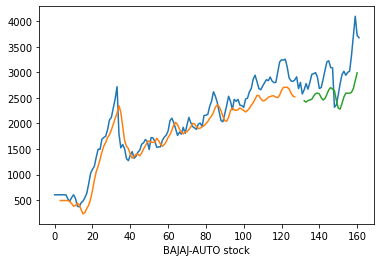

Epoch 1/20
2/2 [==============================] - 5s 628ms/step - loss: 0.0521 - val_loss: 0.0467
Epoch 2/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0411 - val_loss: 0.0471
Epoch 3/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0144 - val_loss: 0.0369
Epoch 4/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0049 - val_loss: 0.0983
Epoch 5/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0156 - val_loss: 0.0587
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0086 - val_loss: 0.0239
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0029 - val_loss: 0.0283
Epoch 8/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0064 - val_loss: 0.0291
Epoch 9/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0068 - val_loss: 0.0221
Epoch 10/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0030 - val_loss: 0.0279
Epoch 11/20
2/2 [===========

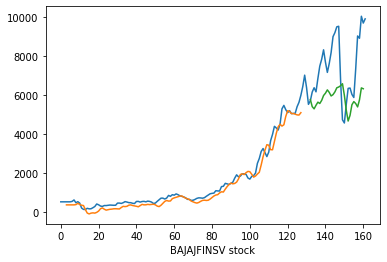

Epoch 1/20
2/2 [==============================] - 4s 621ms/step - loss: 0.0622 - val_loss: 0.0237
Epoch 2/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0194 - val_loss: 0.0692
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0372 - val_loss: 0.0134
Epoch 4/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0099 - val_loss: 0.0239
Epoch 5/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0166 - val_loss: 0.0487
Epoch 6/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0202 - val_loss: 0.0282
Epoch 7/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0105 - val_loss: 0.0073
Epoch 8/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0082 - val_loss: 0.0054
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0116 - val_loss: 0.0060
Epoch 10/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0110 - val_loss: 0.0041
Epoch 11/20
2/2 [===========

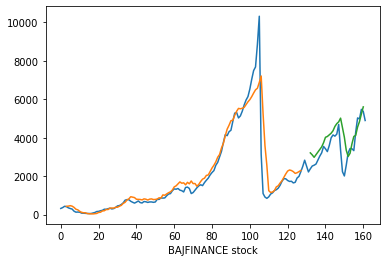

Epoch 1/20
2/2 [==============================] - 4s 591ms/step - loss: 0.0945 - val_loss: 0.1025
Epoch 2/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0647 - val_loss: 0.0110
Epoch 3/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0207 - val_loss: 0.0480
Epoch 4/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0387 - val_loss: 0.0170
Epoch 5/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0141 - val_loss: 0.0102
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0158 - val_loss: 0.0233
Epoch 7/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0219 - val_loss: 0.0144
Epoch 8/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0137 - val_loss: 0.0059
Epoch 9/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0117 - val_loss: 0.0099
Epoch 10/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0151 - val_loss: 0.0093
Epoch 11/20
2/2 [===========

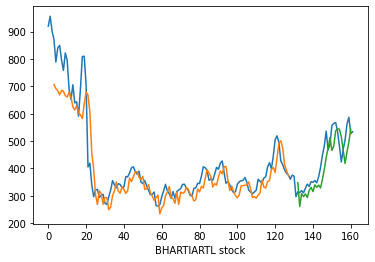

Epoch 1/20
2/2 [==============================] - 4s 1s/step - loss: 0.3146 - val_loss: 0.0176
Epoch 2/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0429 - val_loss: 0.0997
Epoch 3/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0862 - val_loss: 0.1330
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0917 - val_loss: 0.1141
Epoch 5/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0679 - val_loss: 0.0790
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0491 - val_loss: 0.0503
Epoch 7/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0442 - val_loss: 0.0328
Epoch 8/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0456 - val_loss: 0.0236
Epoch 9/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0433 - val_loss: 0.0204
Epoch 10/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0369 - val_loss: 0.0197
Epoch 11/20
2/2 [==============

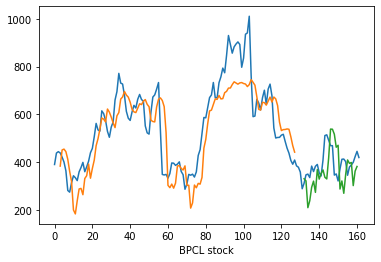

Epoch 1/20
2/2 [==============================] - 4s 631ms/step - loss: 0.0317 - val_loss: 0.0813
Epoch 2/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0126 - val_loss: 0.0239
Epoch 3/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0224 - val_loss: 0.0159
Epoch 4/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0082 - val_loss: 0.0520
Epoch 5/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0115 - val_loss: 0.0782
Epoch 6/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0124 - val_loss: 0.0331
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0039 - val_loss: 0.0116
Epoch 8/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0078 - val_loss: 0.0126
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0076 - val_loss: 0.0118
Epoch 10/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0035 - val_loss: 0.0278
Epoch 11/20
2/2 [===========

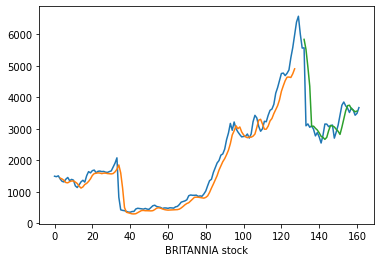

Epoch 1/20
2/2 [==============================] - 4s 614ms/step - loss: 0.2377 - val_loss: 0.1347
Epoch 2/20
2/2 [==============================] - 0s 35ms/step - loss: 0.1371 - val_loss: 0.1125
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0763 - val_loss: 0.0481
Epoch 4/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0228 - val_loss: 0.1375
Epoch 5/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0433 - val_loss: 0.1189
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0293 - val_loss: 0.0422
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0072 - val_loss: 0.0233
Epoch 8/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0136 - val_loss: 0.0356
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0198 - val_loss: 0.0285
Epoch 10/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0122 - val_loss: 0.0190
Epoch 11/20
2/2 [===========

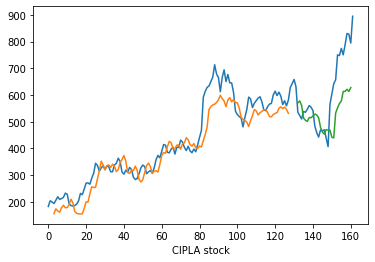

Epoch 1/20
2/2 [==============================] - 4s 661ms/step - loss: 0.0961 - val_loss: 0.1224
Epoch 2/20
2/2 [==============================] - 0s 35ms/step - loss: 0.0744 - val_loss: 0.0694
Epoch 3/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0215 - val_loss: 0.0177
Epoch 4/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0403 - val_loss: 0.0432
Epoch 5/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0142 - val_loss: 0.0963
Epoch 6/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0248 - val_loss: 0.1057
Epoch 7/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0217 - val_loss: 0.0785
Epoch 8/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0113 - val_loss: 0.0514
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0134 - val_loss: 0.0396
Epoch 10/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0163 - val_loss: 0.0428
Epoch 11/20
2/2 [===========

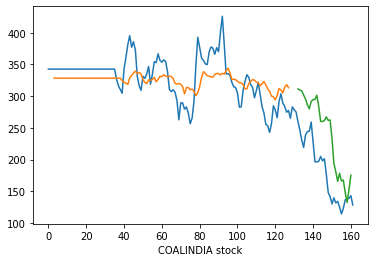

Epoch 1/20
2/2 [==============================] - 4s 626ms/step - loss: 0.2868 - val_loss: 0.0149
Epoch 2/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0635 - val_loss: 0.1246
Epoch 3/20
2/2 [==============================] - 0s 37ms/step - loss: 0.1468 - val_loss: 0.0953
Epoch 4/20
2/2 [==============================] - 0s 38ms/step - loss: 0.1023 - val_loss: 0.0338
Epoch 5/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0365 - val_loss: 0.0276
Epoch 6/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0069 - val_loss: 0.0799
Epoch 7/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0169 - val_loss: 0.1310
Epoch 8/20
2/2 [==============================] - 0s 36ms/step - loss: 0.0312 - val_loss: 0.1319
Epoch 9/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0286 - val_loss: 0.0967
Epoch 10/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0158 - val_loss: 0.0607
Epoch 11/20
2/2 [===========

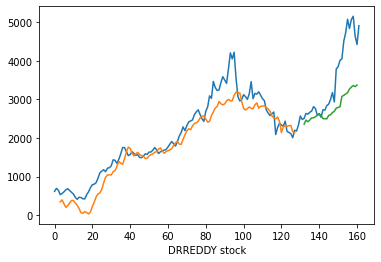

Epoch 1/20
2/2 [==============================] - 4s 633ms/step - loss: 0.1877 - val_loss: 0.0419
Epoch 2/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0252 - val_loss: 0.1855
Epoch 3/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0547 - val_loss: 0.1282
Epoch 4/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0322 - val_loss: 0.0603
Epoch 5/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0161 - val_loss: 0.0376
Epoch 6/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0123 - val_loss: 0.0311
Epoch 7/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0142 - val_loss: 0.0296
Epoch 8/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0164 - val_loss: 0.0301
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0173 - val_loss: 0.0316
Epoch 10/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0160 - val_loss: 0.0343
Epoch 11/20
2/2 [===========

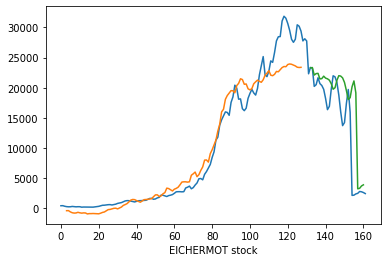

Epoch 1/20
2/2 [==============================] - 4s 615ms/step - loss: 0.2516 - val_loss: 0.2706
Epoch 2/20
2/2 [==============================] - 0s 38ms/step - loss: 0.1664 - val_loss: 0.0721
Epoch 3/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0302 - val_loss: 0.0323
Epoch 4/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0707 - val_loss: 0.0292
Epoch 5/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0636 - val_loss: 0.0325
Epoch 6/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0394 - val_loss: 0.0428
Epoch 7/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0240 - val_loss: 0.0575
Epoch 8/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0193 - val_loss: 0.0731
Epoch 9/20
2/2 [==============================] - 0s 37ms/step - loss: 0.0202 - val_loss: 0.0858
Epoch 10/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0229 - val_loss: 0.0931
Epoch 11/20
2/2 [===========

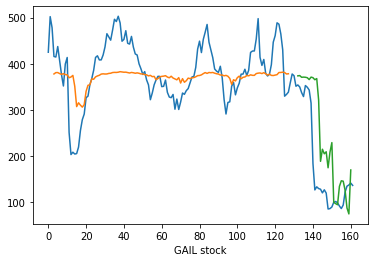

Epoch 1/20
2/2 [==============================] - 5s 652ms/step - loss: 0.1026 - val_loss: 0.0112
Epoch 2/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0408 - val_loss: 0.0046
Epoch 3/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0677 - val_loss: 0.0011
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0205 - val_loss: 0.0059
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0378 - val_loss: 0.0048
Epoch 6/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0202 - val_loss: 0.0013
Epoch 7/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0199 - val_loss: 0.0016
Epoch 8/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0258 - val_loss: 0.0016
Epoch 9/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0132 - val_loss: 0.0015
Epoch 10/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0162 - val_loss: 0.0018
Epoch 11/20
2/2 [===========

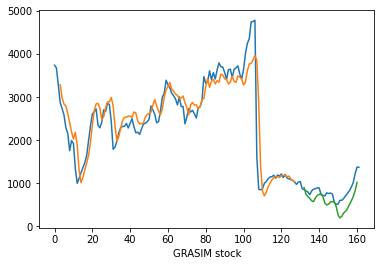

Epoch 1/20
2/2 [==============================] - 4s 624ms/step - loss: 0.0419 - val_loss: 0.0846
Epoch 2/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0450 - val_loss: 0.0210
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0092 - val_loss: 0.0144
Epoch 4/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0209 - val_loss: 0.0183
Epoch 5/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0184 - val_loss: 0.0065
Epoch 6/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0069 - val_loss: 0.0164
Epoch 7/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0112 - val_loss: 0.0268
Epoch 8/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0137 - val_loss: 0.0196
Epoch 9/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0069 - val_loss: 0.0070
Epoch 11/20
2/2 [===========

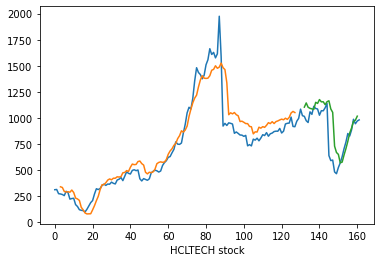

Epoch 1/20
2/2 [==============================] - 5s 1s/step - loss: 0.0673 - val_loss: 0.0093
Epoch 2/20
2/2 [==============================] - 0s 174ms/step - loss: 0.0363 - val_loss: 0.0861
Epoch 3/20
2/2 [==============================] - 0s 135ms/step - loss: 0.0400 - val_loss: 0.0100
Epoch 4/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0218 - val_loss: 0.0164
Epoch 5/20
2/2 [==============================] - 0s 139ms/step - loss: 0.0345 - val_loss: 0.0110
Epoch 6/20
2/2 [==============================] - 0s 76ms/step - loss: 0.0243 - val_loss: 0.0181
Epoch 7/20
2/2 [==============================] - 0s 95ms/step - loss: 0.0197 - val_loss: 0.0375
Epoch 8/20
2/2 [==============================] - 0s 73ms/step - loss: 0.0239 - val_loss: 0.0328
Epoch 9/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0202 - val_loss: 0.0129
Epoch 10/20
2/2 [==============================] - 0s 78ms/step - loss: 0.0141 - val_loss: 0.0095
Epoch 11/20
2/2 [===========

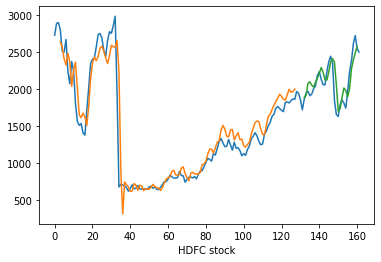

Epoch 1/20
2/2 [==============================] - 8s 1s/step - loss: 0.0545 - val_loss: 0.0505
Epoch 2/20
2/2 [==============================] - 0s 101ms/step - loss: 0.0253 - val_loss: 0.0559
Epoch 3/20
2/2 [==============================] - 0s 202ms/step - loss: 0.0429 - val_loss: 0.0332
Epoch 4/20
2/2 [==============================] - 0s 110ms/step - loss: 0.0226 - val_loss: 0.0375
Epoch 5/20
2/2 [==============================] - 0s 116ms/step - loss: 0.0247 - val_loss: 0.0357
Epoch 6/20
2/2 [==============================] - 0s 121ms/step - loss: 0.0195 - val_loss: 0.0199
Epoch 7/20
2/2 [==============================] - 0s 67ms/step - loss: 0.0146 - val_loss: 0.0234
Epoch 8/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0173 - val_loss: 0.0165
Epoch 9/20
2/2 [==============================] - 0s 94ms/step - loss: 0.0153 - val_loss: 0.0221
Epoch 10/20
2/2 [==============================] - 0s 85ms/step - loss: 0.0137 - val_loss: 0.0156
Epoch 11/20
2/2 [=========

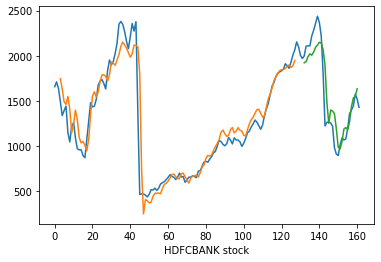

Epoch 1/20
2/2 [==============================] - 5s 955ms/step - loss: 0.3342 - val_loss: 0.1093
Epoch 2/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0681 - val_loss: 0.0169
Epoch 3/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0491 - val_loss: 0.0259
Epoch 4/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0719 - val_loss: 0.0262
Epoch 5/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0671 - val_loss: 0.0166
Epoch 6/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0531 - val_loss: 0.0150
Epoch 7/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0423 - val_loss: 0.0198
Epoch 8/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0385 - val_loss: 0.0239
Epoch 9/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0362 - val_loss: 0.0241
Epoch 10/20
2/2 [==============================] - 0s 98ms/step - loss: 0.0332 - val_loss: 0.0207
Epoch 11/20
2/2 [===========

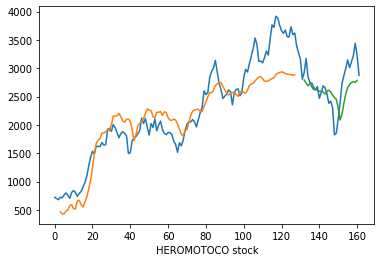

Epoch 1/20
2/2 [==============================] - 4s 595ms/step - loss: 0.1459 - val_loss: 0.0382
Epoch 2/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0551 - val_loss: 0.2355
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1010 - val_loss: 0.0331
Epoch 4/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0139 - val_loss: 0.0544
Epoch 5/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0472 - val_loss: 0.0598
Epoch 6/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0366 - val_loss: 0.0164
Epoch 7/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0080 - val_loss: 0.0336
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0181 - val_loss: 0.0540
Epoch 9/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0234 - val_loss: 0.0338
Epoch 10/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0108 - val_loss: 0.0164
Epoch 11/20
2/2 [===========

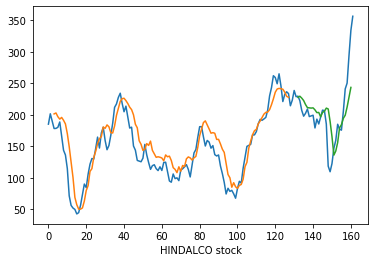

Epoch 1/20
2/2 [==============================] - 5s 631ms/step - loss: 0.1506 - val_loss: 0.0311
Epoch 2/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0418 - val_loss: 0.0221
Epoch 3/20
2/2 [==============================] - 0s 38ms/step - loss: 0.0808 - val_loss: 0.0109
Epoch 4/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0435 - val_loss: 0.0130
Epoch 5/20
2/2 [==============================] - 0s 40ms/step - loss: 0.0072 - val_loss: 0.0749
Epoch 6/20
2/2 [==============================] - 0s 67ms/step - loss: 0.0050 - val_loss: 0.1648
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0183 - val_loss: 0.1895
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0200 - val_loss: 0.1452
Epoch 9/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0108 - val_loss: 0.0941
Epoch 10/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0036 - val_loss: 0.0613
Epoch 11/20
2/2 [===========

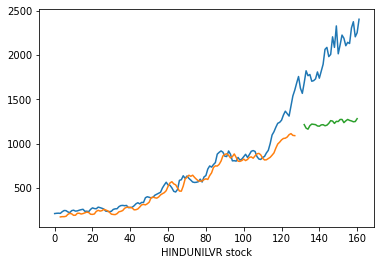

Epoch 1/20
2/2 [==============================] - 4s 640ms/step - loss: 0.1701 - val_loss: 0.0384
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0539 - val_loss: 0.0279
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1021 - val_loss: 0.0104
Epoch 4/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0193 - val_loss: 0.0078
Epoch 5/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0501 - val_loss: 0.0149
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0483 - val_loss: 0.0030
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0146 - val_loss: 0.0070
Epoch 8/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0284 - val_loss: 0.0105
Epoch 9/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0307 - val_loss: 0.0030
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0137 - val_loss: 0.0038
Epoch 11/20
2/2 [===========

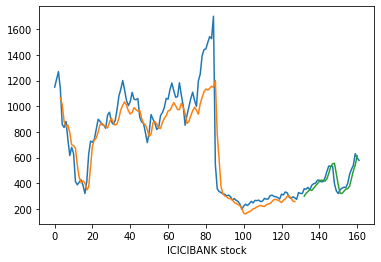

Epoch 1/20
2/2 [==============================] - 4s 638ms/step - loss: 0.0834 - val_loss: 0.0900
Epoch 2/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0756 - val_loss: 0.0417
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0248 - val_loss: 0.0355
Epoch 4/20
2/2 [==============================] - 0s 39ms/step - loss: 0.0223 - val_loss: 0.0540
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0301 - val_loss: 0.0205
Epoch 6/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0122 - val_loss: 0.0303
Epoch 7/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0129 - val_loss: 0.0585
Epoch 8/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0185 - val_loss: 0.0533
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0116 - val_loss: 0.0273
Epoch 10/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0043 - val_loss: 0.0161
Epoch 11/20
2/2 [===========

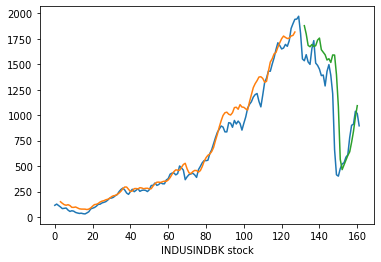

Epoch 1/20
2/2 [==============================] - 4s 632ms/step - loss: 0.0417 - val_loss: 0.0342
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0430 - val_loss: 0.0146
Epoch 3/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0160 - val_loss: 0.0058
Epoch 4/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0235 - val_loss: 0.0051
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0139 - val_loss: 0.0058
Epoch 6/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0186 - val_loss: 0.0035
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0098 - val_loss: 0.0029
Epoch 8/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0138 - val_loss: 0.0030
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0104 - val_loss: 0.0063
Epoch 10/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0074 - val_loss: 0.0103
Epoch 11/20
2/2 [===========

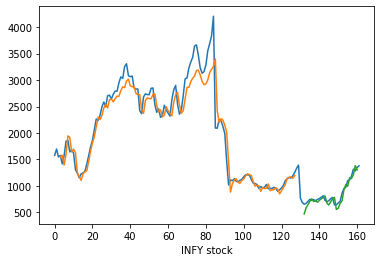

Epoch 1/20
2/2 [==============================] - 4s 597ms/step - loss: 0.2262 - val_loss: 0.0235
Epoch 2/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0548 - val_loss: 0.0675
Epoch 3/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1095 - val_loss: 0.0774
Epoch 4/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0993 - val_loss: 0.0639
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0555 - val_loss: 0.0410
Epoch 6/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0245 - val_loss: 0.0229
Epoch 7/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0347 - val_loss: 0.0151
Epoch 8/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0444 - val_loss: 0.0138
Epoch 9/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0316 - val_loss: 0.0161
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0172 - val_loss: 0.0190
Epoch 11/20
2/2 [===========

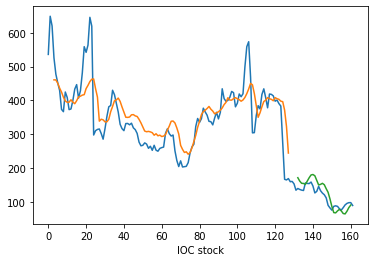

Epoch 1/20
2/2 [==============================] - 4s 646ms/step - loss: 1.8150 - val_loss: 0.1210
Epoch 2/20
2/2 [==============================] - 0s 42ms/step - loss: 0.2478 - val_loss: 0.6596
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.5054 - val_loss: 0.5510
Epoch 4/20
2/2 [==============================] - 0s 43ms/step - loss: 0.3094 - val_loss: 0.1632
Epoch 5/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0794 - val_loss: 0.0337
Epoch 6/20
2/2 [==============================] - 0s 68ms/step - loss: 0.0580 - val_loss: 0.0209
Epoch 7/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0675 - val_loss: 0.0188
Epoch 8/20
2/2 [==============================] - 0s 78ms/step - loss: 0.0501 - val_loss: 0.0161
Epoch 9/20
2/2 [==============================] - 0s 92ms/step - loss: 0.0255 - val_loss: 0.0277
Epoch 10/20
2/2 [==============================] - 0s 80ms/step - loss: 0.0228 - val_loss: 0.0477
Epoch 11/20
2/2 [===========

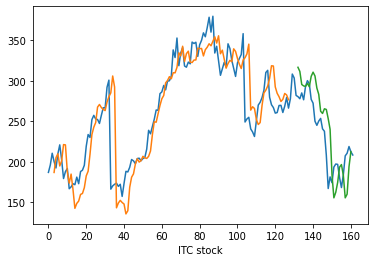

Epoch 1/20
2/2 [==============================] - 5s 633ms/step - loss: 0.8501 - val_loss: 0.1756
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.5844 - val_loss: 0.1935
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.4266 - val_loss: 0.0533
Epoch 4/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0771 - val_loss: 0.0042
Epoch 5/20
2/2 [==============================] - 0s 41ms/step - loss: 0.1586 - val_loss: 0.0108
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1866 - val_loss: 0.0064
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0716 - val_loss: 0.0038
Epoch 8/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0392 - val_loss: 0.0115
Epoch 9/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0865 - val_loss: 0.0160
Epoch 10/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0966 - val_loss: 0.0105
Epoch 11/20
2/2 [===========

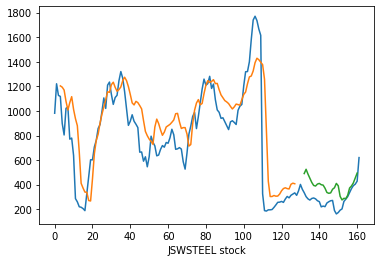

Epoch 1/20
2/2 [==============================] - 4s 628ms/step - loss: 0.1363 - val_loss: 0.0323
Epoch 2/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0942 - val_loss: 0.0424
Epoch 3/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0654 - val_loss: 0.0563
Epoch 4/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0124 - val_loss: 0.2240
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0363 - val_loss: 0.2647
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0415 - val_loss: 0.1898
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0210 - val_loss: 0.1066
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0090 - val_loss: 0.0590
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0136 - val_loss: 0.0412
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0186 - val_loss: 0.0417
Epoch 11/20
2/2 [===========

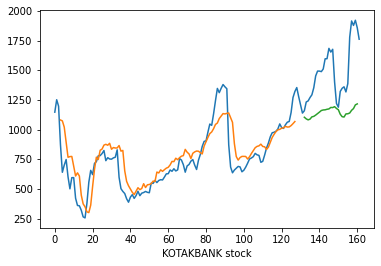

Epoch 1/20
2/2 [==============================] - 4s 611ms/step - loss: 0.2463 - val_loss: 0.1651
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.2007 - val_loss: 0.1016
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0833 - val_loss: 0.0050
Epoch 4/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0225 - val_loss: 0.0460
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0713 - val_loss: 0.0487
Epoch 6/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0501 - val_loss: 0.0128
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0163 - val_loss: 0.0076
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0266 - val_loss: 0.0180
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0368 - val_loss: 0.0138
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0223 - val_loss: 0.0049
Epoch 11/20
2/2 [===========

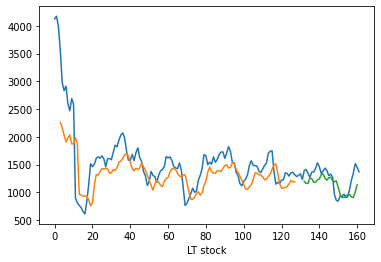

Epoch 1/20
2/2 [==============================] - 5s 617ms/step - loss: 0.1310 - val_loss: 0.1324
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1058 - val_loss: 0.1555
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0746 - val_loss: 0.0663
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0446 - val_loss: 0.0233
Epoch 5/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0656 - val_loss: 0.0169
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0559 - val_loss: 0.0257
Epoch 7/20
2/2 [==============================] - 0s 78ms/step - loss: 0.0325 - val_loss: 0.0415
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0295 - val_loss: 0.0475
Epoch 9/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0314 - val_loss: 0.0345
Epoch 10/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0243 - val_loss: 0.0164
Epoch 11/20
2/2 [===========

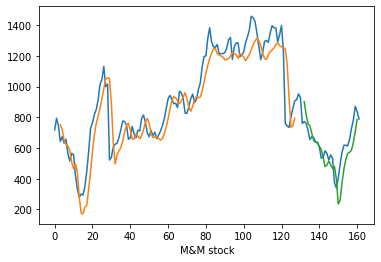

Epoch 1/20
2/2 [==============================] - 4s 692ms/step - loss: 0.1167 - val_loss: 0.0746
Epoch 2/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0821 - val_loss: 0.1036
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0527 - val_loss: 0.0098
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0120 - val_loss: 0.0503
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0304 - val_loss: 0.0584
Epoch 6/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0315 - val_loss: 0.0142
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0147 - val_loss: 0.0237
Epoch 8/20
2/2 [==============================] - 0s 71ms/step - loss: 0.0118 - val_loss: 0.0694
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0169 - val_loss: 0.0698
Epoch 10/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0137 - val_loss: 0.0312
Epoch 11/20
2/2 [===========

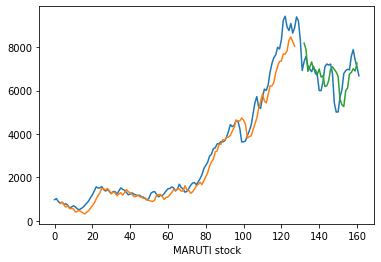

Epoch 1/20
2/2 [==============================] - 4s 623ms/step - loss: 0.0436 - val_loss: 0.2231
Epoch 2/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0089 - val_loss: 0.0206
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0257 - val_loss: 0.0929
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0041 - val_loss: 0.3879
Epoch 5/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0099 - val_loss: 0.4764
Epoch 6/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0090 - val_loss: 0.3213
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0017 - val_loss: 0.1947
Epoch 8/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0056 - val_loss: 0.1832
Epoch 9/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0050 - val_loss: 0.2593
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0013 - val_loss: 0.3623
Epoch 11/20
2/2 [===========

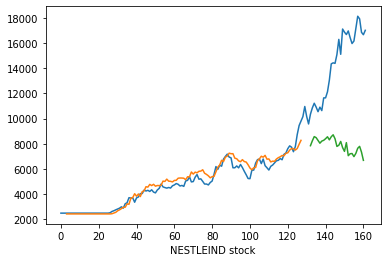

Epoch 1/20
2/2 [==============================] - 5s 667ms/step - loss: 2.0181 - val_loss: 0.0838
Epoch 2/20
2/2 [==============================] - 0s 42ms/step - loss: 0.2898 - val_loss: 0.0979
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0843 - val_loss: 0.2921
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2406 - val_loss: 0.3179
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2470 - val_loss: 0.2497
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1880 - val_loss: 0.1618
Epoch 7/20
2/2 [==============================] - 0s 58ms/step - loss: 0.1133 - val_loss: 0.0765
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0376 - val_loss: 0.0161
Epoch 9/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0178 - val_loss: 0.0029
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0550 - val_loss: 0.0046
Epoch 11/20
2/2 [===========

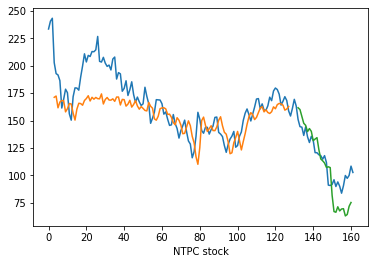

Epoch 1/20
2/2 [==============================] - 4s 627ms/step - loss: 0.2060 - val_loss: 0.0312
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1112 - val_loss: 0.0353
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0998 - val_loss: 0.0118
Epoch 4/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0309 - val_loss: 7.3177e-04
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0332 - val_loss: 0.0038
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0441 - val_loss: 0.0097
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0409 - val_loss: 0.0116
Epoch 8/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0272 - val_loss: 0.0098
Epoch 9/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0153 - val_loss: 0.0071
Epoch 10/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0137 - val_loss: 0.0055
Epoch 11/20
2/2 [=======

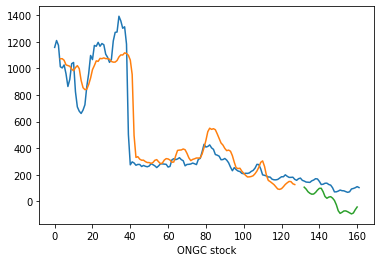

Epoch 1/20
2/2 [==============================] - 4s 601ms/step - loss: 0.0726 - val_loss: 0.0454
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0305 - val_loss: 0.1049
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0366 - val_loss: 0.0467
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0122 - val_loss: 0.0119
Epoch 5/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0164 - val_loss: 0.0213
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0159 - val_loss: 0.0078
Epoch 7/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0076 - val_loss: 0.0145
Epoch 8/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0123 - val_loss: 0.0135
Epoch 9/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0096 - val_loss: 0.0072
Epoch 10/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0069 - val_loss: 0.0114
Epoch 11/20
2/2 [===========

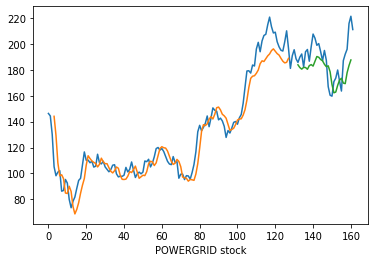

Epoch 1/20
2/2 [==============================] - 5s 650ms/step - loss: 0.0837 - val_loss: 0.0326
Epoch 2/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0217 - val_loss: 0.0767
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0704 - val_loss: 0.0714
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0496 - val_loss: 0.0185
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0148 - val_loss: 0.0175
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0180 - val_loss: 0.0455
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0307 - val_loss: 0.0349
Epoch 8/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0213 - val_loss: 0.0125
Epoch 9/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0127 - val_loss: 0.0164
Epoch 11/20
2/2 [===========

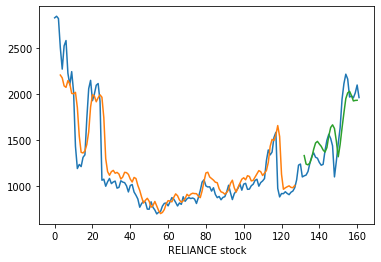

Epoch 1/20
2/2 [==============================] - 4s 663ms/step - loss: 0.2166 - val_loss: 0.0274
Epoch 2/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0690 - val_loss: 0.0515
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0831 - val_loss: 0.0431
Epoch 4/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0388 - val_loss: 0.0265
Epoch 5/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0357 - val_loss: 0.0140
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0416 - val_loss: 0.0065
Epoch 7/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0420 - val_loss: 0.0031
Epoch 8/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0387 - val_loss: 0.0025
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0329 - val_loss: 0.0033
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0271 - val_loss: 0.0046
Epoch 11/20
2/2 [===========

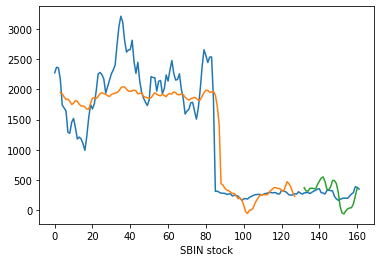

Epoch 1/20
2/2 [==============================] - 4s 618ms/step - loss: 0.3171 - val_loss: 0.0111
Epoch 2/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0612 - val_loss: 0.1840
Epoch 3/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1316 - val_loss: 0.0534
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0555 - val_loss: 0.0196
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0084 - val_loss: 0.0850
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0090 - val_loss: 0.1334
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0218 - val_loss: 0.1396
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0261 - val_loss: 0.1143
Epoch 9/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0201 - val_loss: 0.0770
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0107 - val_loss: 0.0434
Epoch 11/20
2/2 [===========

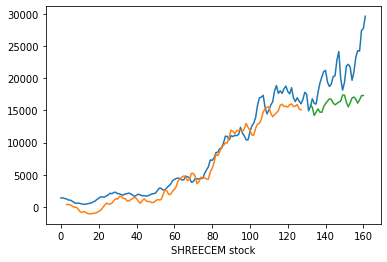

Epoch 1/20
2/2 [==============================] - 5s 608ms/step - loss: 1.6236 - val_loss: 0.0798
Epoch 2/20
2/2 [==============================] - 0s 60ms/step - loss: 0.2073 - val_loss: 0.3641
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.6371 - val_loss: 0.2964
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.3850 - val_loss: 0.1293
Epoch 5/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0977 - val_loss: 0.0303
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0522 - val_loss: 0.0027
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0998 - val_loss: 0.0049
Epoch 8/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1115 - val_loss: 0.0101
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0826 - val_loss: 0.0108
Epoch 10/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0393 - val_loss: 0.0088
Epoch 11/20
2/2 [===========

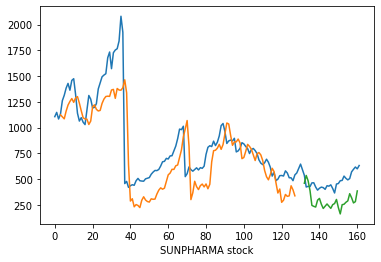

Epoch 1/20
2/2 [==============================] - 4s 609ms/step - loss: 0.1125 - val_loss: 0.0052
Epoch 2/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0383 - val_loss: 0.0145
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0893 - val_loss: 0.0065
Epoch 4/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0354 - val_loss: 0.0062
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0286 - val_loss: 0.0138
Epoch 6/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0442 - val_loss: 0.0088
Epoch 7/20
2/2 [==============================] - 0s 62ms/step - loss: 0.0208 - val_loss: 0.0039
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0187 - val_loss: 0.0038
Epoch 9/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0273 - val_loss: 0.0035
Epoch 10/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0212 - val_loss: 0.0036
Epoch 11/20
2/2 [===========

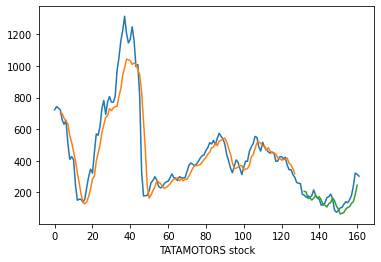

Epoch 1/20
2/2 [==============================] - 4s 605ms/step - loss: 0.2189 - val_loss: 0.2566
Epoch 2/20
2/2 [==============================] - 0s 77ms/step - loss: 0.2117 - val_loss: 0.0468
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0288 - val_loss: 0.0673
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0779 - val_loss: 0.0862
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0623 - val_loss: 0.0263
Epoch 6/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0173 - val_loss: 0.0303
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0336 - val_loss: 0.0527
Epoch 8/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0463 - val_loss: 0.0357
Epoch 9/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0246 - val_loss: 0.0171
Epoch 10/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0114 - val_loss: 0.0246
Epoch 11/20
2/2 [===========

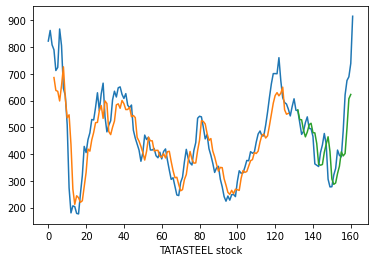

Epoch 1/20
2/2 [==============================] - 5s 611ms/step - loss: 0.1342 - val_loss: 0.1209
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1078 - val_loss: 0.0649
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0450 - val_loss: 0.0097
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0071 - val_loss: 0.0181
Epoch 5/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0174 - val_loss: 0.0289
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0237 - val_loss: 0.0164
Epoch 7/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0131 - val_loss: 0.0082
Epoch 8/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0056 - val_loss: 0.0119
Epoch 9/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0073 - val_loss: 0.0181
Epoch 10/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0116 - val_loss: 0.0206
Epoch 11/20
2/2 [===========

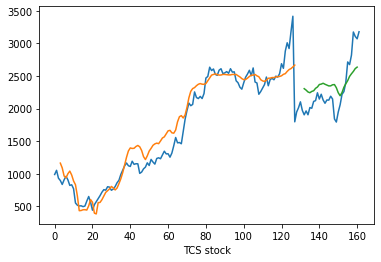

Epoch 1/20
2/2 [==============================] - 5s 623ms/step - loss: 0.0868 - val_loss: 0.0361
Epoch 2/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0263 - val_loss: 0.0325
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0652 - val_loss: 0.0059
Epoch 4/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0156 - val_loss: 0.0220
Epoch 5/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0356 - val_loss: 0.0255
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0248 - val_loss: 0.0018
Epoch 7/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 8/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0206 - val_loss: 0.0098
Epoch 9/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0167 - val_loss: 0.0013
Epoch 10/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0068 - val_loss: 0.0051
Epoch 11/20
2/2 [===========

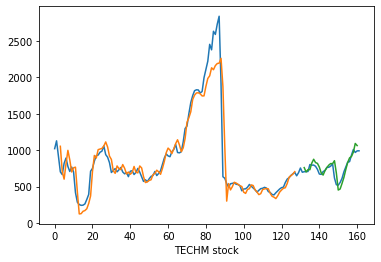

Epoch 1/20
2/2 [==============================] - 4s 632ms/step - loss: 0.0302 - val_loss: 0.0203
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0202 - val_loss: 0.0065
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0209 - val_loss: 0.0016
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0142 - val_loss: 0.0201
Epoch 5/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0174 - val_loss: 0.0211
Epoch 6/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0150 - val_loss: 0.0041
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0118 - val_loss: 0.0013
Epoch 8/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0127 - val_loss: 9.5864e-04
Epoch 9/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0098 - val_loss: 0.0061
Epoch 10/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0117 - val_loss: 0.0093
Epoch 11/20
2/2 [=======

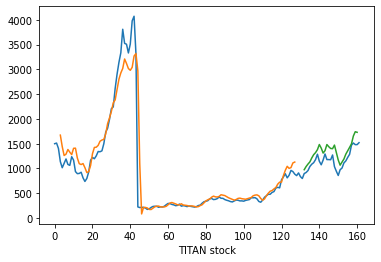

Epoch 1/20
2/2 [==============================] - 5s 622ms/step - loss: 0.1785 - val_loss: 0.1968
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0419 - val_loss: 0.0861
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0585 - val_loss: 0.0369
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0175 - val_loss: 0.0636
Epoch 5/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0192 - val_loss: 0.1357
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0251 - val_loss: 0.0498
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0049 - val_loss: 0.0124
Epoch 8/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0155 - val_loss: 0.0121
Epoch 9/20
2/2 [==============================] - 0s 76ms/step - loss: 0.0131 - val_loss: 0.0254
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0046 - val_loss: 0.0659
Epoch 11/20
2/2 [===========

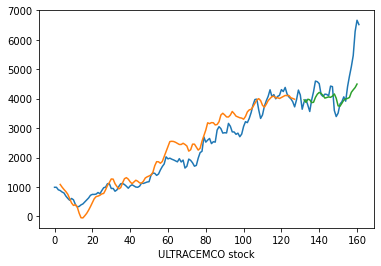

Epoch 1/20
2/2 [==============================] - 7s 726ms/step - loss: 0.0692 - val_loss: 0.0355
Epoch 2/20
2/2 [==============================] - 0s 81ms/step - loss: 0.0361 - val_loss: 0.0272
Epoch 3/20
2/2 [==============================] - 0s 119ms/step - loss: 0.0443 - val_loss: 3.7277e-05
Epoch 4/20
2/2 [==============================] - 0s 96ms/step - loss: 0.0169 - val_loss: 0.0231
Epoch 5/20
2/2 [==============================] - 0s 127ms/step - loss: 0.0284 - val_loss: 0.0085
Epoch 6/20
2/2 [==============================] - 0s 127ms/step - loss: 0.0142 - val_loss: 0.0049
Epoch 7/20
2/2 [==============================] - 0s 135ms/step - loss: 0.0167 - val_loss: 0.0093
Epoch 8/20
2/2 [==============================] - 0s 89ms/step - loss: 0.0157 - val_loss: 1.0908e-05
Epoch 9/20
2/2 [==============================] - 0s 159ms/step - loss: 0.0099 - val_loss: 0.0056
Epoch 10/20
2/2 [==============================] - 0s 131ms/step - loss: 0.0145 - val_loss: 0.0037
Epoch 11/20
2/

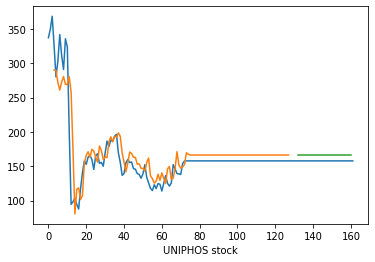

Epoch 1/20
2/2 [==============================] - 4s 655ms/step - loss: 0.1843 - val_loss: 0.3968
Epoch 2/20
2/2 [==============================] - 0s 64ms/step - loss: 0.1470 - val_loss: 0.1869
Epoch 3/20
2/2 [==============================] - 0s 67ms/step - loss: 0.0349 - val_loss: 0.0338
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0205 - val_loss: 0.0784
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0439 - val_loss: 0.0539
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0252 - val_loss: 0.0329
Epoch 7/20
2/2 [==============================] - 0s 66ms/step - loss: 0.0103 - val_loss: 0.0634
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0145 - val_loss: 0.0807
Epoch 9/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0174 - val_loss: 0.0580
Epoch 10/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0115 - val_loss: 0.0348
Epoch 11/20
2/2 [===========

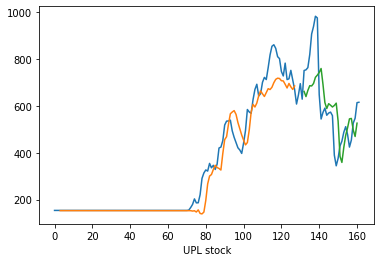

Epoch 1/20
2/2 [==============================] - 5s 636ms/step - loss: 0.0646 - val_loss: 0.0017
Epoch 2/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0088 - val_loss: 0.0110
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0475 - val_loss: 0.0050
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0199 - val_loss: 3.0805e-04
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0076 - val_loss: 0.0051
Epoch 6/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0203 - val_loss: 0.0046
Epoch 7/20
2/2 [==============================] - 0s 63ms/step - loss: 0.0174 - val_loss: 7.4505e-04
Epoch 8/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0078 - val_loss: 4.3569e-04
Epoch 9/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 10/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0095 - val_loss: 0.0026
Epoch 11/20
2/2 

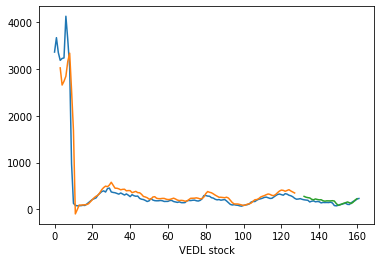

Epoch 1/20
2/2 [==============================] - 4s 619ms/step - loss: 0.1324 - val_loss: 0.0687
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1298 - val_loss: 0.0308
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0423 - val_loss: 0.0152
Epoch 4/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0624 - val_loss: 0.0165
Epoch 5/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0558 - val_loss: 0.0124
Epoch 6/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0272 - val_loss: 0.0191
Epoch 7/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0289 - val_loss: 0.0283
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0371 - val_loss: 0.0265
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0321 - val_loss: 0.0173
Epoch 10/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0223 - val_loss: 0.0103
Epoch 11/20
2/2 [===========

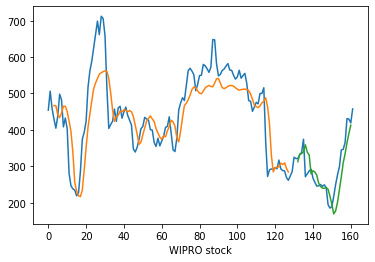

Epoch 1/20
2/2 [==============================] - 4s 635ms/step - loss: 0.1437 - val_loss: 0.2394
Epoch 2/20
2/2 [==============================] - 0s 61ms/step - loss: 0.1493 - val_loss: 0.0812
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0406 - val_loss: 0.0227
Epoch 4/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0541 - val_loss: 0.0298
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0417 - val_loss: 0.0082
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0126 - val_loss: 0.0301
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0161 - val_loss: 0.0434
Epoch 8/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0200 - val_loss: 0.0287
Epoch 9/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0117 - val_loss: 0.0113
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0113 - val_loss: 0.0091
Epoch 11/20
2/2 [===========

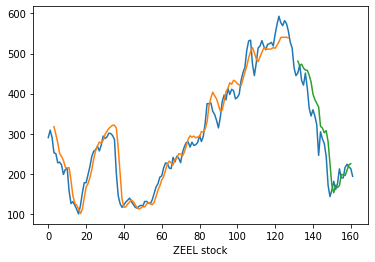

In [43]:
# RNN are sensitive to the scale of the daya,so we apply MinMax scaler
for i in stocks_dfm.columns:
    scaler=MinMaxScaler(feature_range=(0,1))
    df1=scaler.fit_transform(np.array(stocks_dfm[i]).reshape(-1,1))


    train_data,test_data=df1[0:129],df1[129:len(stocks_dfm)]
    
    time_step = 3
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)

    ### Creating the Stacked RNN model
    model=Sequential()
    model.add(SimpleRNN(100,return_sequences=True,input_shape=(3,1)))
    model.add(SimpleRNN(50,return_sequences=True))
    model.add(SimpleRNN(25,return_sequences=True))
    model.add(SimpleRNN(5))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')   
    model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)
    ### Prediction
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)


    ###Transformback to original form
    train_predict=scaler.inverse_transform(train_predict)
    test_predict=scaler.inverse_transform(test_predict)

    ###Calculating perfomance metrics
    mae = metrics.mean_absolute_error(ytest,test_predict)
    mse = metrics.mean_squared_error(ytest,test_predict)
    rmse = np.sqrt(mse) #mse**(0.5)  

    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("RMSE:", rmse)


    ### Plotting
    # Shift train predictions for plotting
    look_back=3
    trainPredictPlot = numpy.empty_like(df1)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    # Shift test predictions for plotting
    testPredictPlot = numpy.empty_like(df1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
    # Plot baseline and predictions
    plt.plot(scaler.inverse_transform(df1))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.xlabel(i+' stock')
    plt.show()
    

#LSTM

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.0745 - val_loss: 0.0801
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0709 - val_loss: 0.0755
Epoch 3/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0677 - val_loss: 0.0709
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0642 - val_loss: 0.0661
Epoch 5/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0610 - val_loss: 0.0613
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0575 - val_loss: 0.0564
Epoch 7/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0541 - val_loss: 0.0514
Epoch 8/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0506 - val_loss: 0.0463
Epoch 9/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0474 - val_loss: 0.0411
Epoch 10/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0439 - val_loss: 0.0358
Epoch 11/20
2/2 [=============

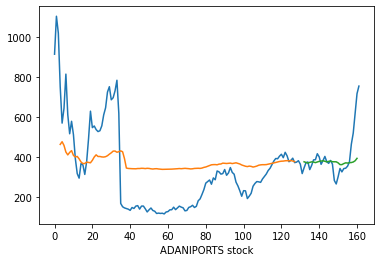

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.1639 - val_loss: 0.0961
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1588 - val_loss: 0.0912
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1544 - val_loss: 0.0862
Epoch 4/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1492 - val_loss: 0.0811
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1442 - val_loss: 0.0760
Epoch 6/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1388 - val_loss: 0.0706
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1337 - val_loss: 0.0651
Epoch 8/20
2/2 [==============================] - 0s 41ms/step - loss: 0.1278 - val_loss: 0.0595
Epoch 9/20
2/2 [==============================] - 0s 40ms/step - loss: 0.1219 - val_loss: 0.0536
Epoch 10/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1156 - val_loss: 0.0474
Epoch 11/20
2/2 [=============

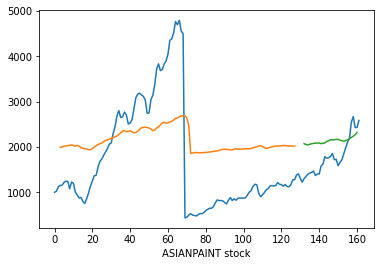

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1715 - val_loss: 0.0364
Epoch 2/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1656 - val_loss: 0.0335
Epoch 3/20
2/2 [==============================] - 0s 59ms/step - loss: 0.1594 - val_loss: 0.0306
Epoch 4/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1536 - val_loss: 0.0277
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1471 - val_loss: 0.0247
Epoch 6/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1404 - val_loss: 0.0218
Epoch 7/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1337 - val_loss: 0.0189
Epoch 8/20
2/2 [==============================] - 0s 41ms/step - loss: 0.1261 - val_loss: 0.0161
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1185 - val_loss: 0.0134
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1102 - val_loss: 0.0109
Epoch 11/20
2/2 [=============

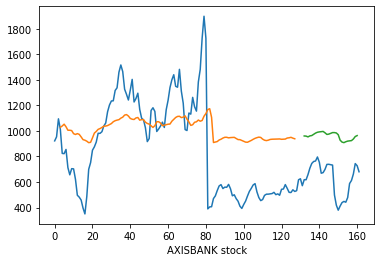

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.2126 - val_loss: 0.4914
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2066 - val_loss: 0.4807
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.2002 - val_loss: 0.4696
Epoch 4/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1937 - val_loss: 0.4579
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1871 - val_loss: 0.4453
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1798 - val_loss: 0.4319
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1722 - val_loss: 0.4172
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1641 - val_loss: 0.4009
Epoch 9/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1551 - val_loss: 0.3828
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1456 - val_loss: 0.3623
Epoch 11/20
2/2 [=============

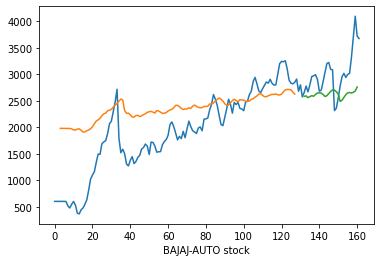

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.0417 - val_loss: 0.5463
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0399 - val_loss: 0.5346
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0379 - val_loss: 0.5225
Epoch 4/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0361 - val_loss: 0.5097
Epoch 5/20
2/2 [==============================] - 0s 41ms/step - loss: 0.0341 - val_loss: 0.4964
Epoch 6/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0324 - val_loss: 0.4822
Epoch 7/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0306 - val_loss: 0.4671
Epoch 8/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0290 - val_loss: 0.4508
Epoch 9/20
2/2 [==============================] - 0s 66ms/step - loss: 0.0275 - val_loss: 0.4334
Epoch 10/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0257 - val_loss: 0.4150
Epoch 11/20
2/2 [=============

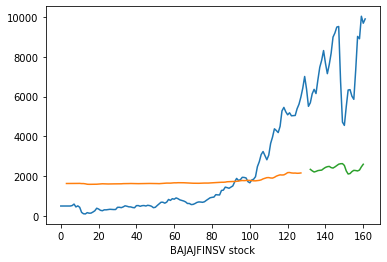

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.0664 - val_loss: 0.1172
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0632 - val_loss: 0.1104
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0599 - val_loss: 0.1037
Epoch 4/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0568 - val_loss: 0.0968
Epoch 5/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0538 - val_loss: 0.0898
Epoch 6/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0510 - val_loss: 0.0826
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0480 - val_loss: 0.0753
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0453 - val_loss: 0.0679
Epoch 9/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0430 - val_loss: 0.0603
Epoch 10/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0408 - val_loss: 0.0527
Epoch 11/20
2/2 [=============

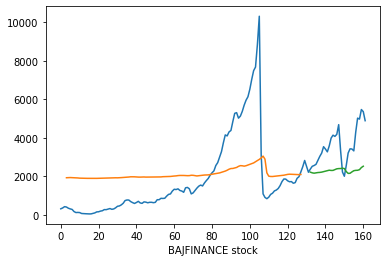

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.0892 - val_loss: 0.0757
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0850 - val_loss: 0.0706
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0807 - val_loss: 0.0656
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0767 - val_loss: 0.0605
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0726 - val_loss: 0.0554
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0683 - val_loss: 0.0503
Epoch 7/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0637 - val_loss: 0.0453
Epoch 8/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0602 - val_loss: 0.0403
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0561 - val_loss: 0.0353
Epoch 10/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0525 - val_loss: 0.0305
Epoch 11/20
2/2 [=============

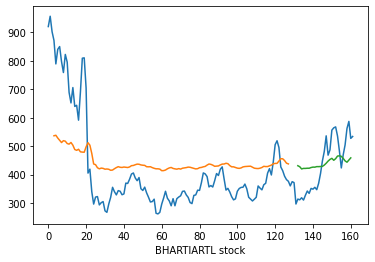

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.2113 - val_loss: 0.0295
Epoch 2/20
2/2 [==============================] - 0s 41ms/step - loss: 0.2052 - val_loss: 0.0272
Epoch 3/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1994 - val_loss: 0.0250
Epoch 4/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1935 - val_loss: 0.0228
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1873 - val_loss: 0.0206
Epoch 6/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1809 - val_loss: 0.0184
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1741 - val_loss: 0.0162
Epoch 8/20
2/2 [==============================] - 0s 42ms/step - loss: 0.1670 - val_loss: 0.0141
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1595 - val_loss: 0.0121
Epoch 10/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1516 - val_loss: 0.0102
Epoch 11/20
2/2 [=============

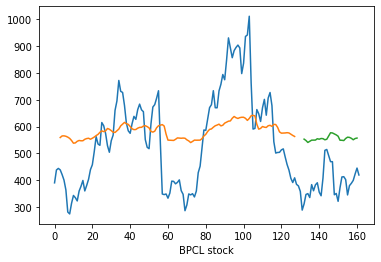

Epoch 1/20
2/2 [==============================] - 21s 3s/step - loss: 0.1014 - val_loss: 0.2220
Epoch 2/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0976 - val_loss: 0.2145
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0941 - val_loss: 0.2067
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0905 - val_loss: 0.1986
Epoch 5/20
2/2 [==============================] - 0s 80ms/step - loss: 0.0868 - val_loss: 0.1903
Epoch 6/20
2/2 [==============================] - 0s 87ms/step - loss: 0.0830 - val_loss: 0.1815
Epoch 7/20
2/2 [==============================] - 0s 98ms/step - loss: 0.0790 - val_loss: 0.1723
Epoch 8/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0750 - val_loss: 0.1625
Epoch 9/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0710 - val_loss: 0.1520
Epoch 10/20
2/2 [==============================] - 0s 43ms/step - loss: 0.0669 - val_loss: 0.1407
Epoch 11/20
2/2 [=============

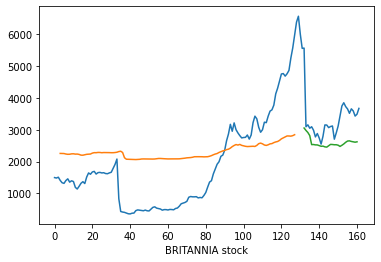

Epoch 1/20
2/2 [==============================] - 18s 3s/step - loss: 0.1538 - val_loss: 0.3532
Epoch 2/20
2/2 [==============================] - 0s 76ms/step - loss: 0.1466 - val_loss: 0.3399
Epoch 3/20
2/2 [==============================] - 0s 70ms/step - loss: 0.1389 - val_loss: 0.3260
Epoch 4/20
2/2 [==============================] - 0s 68ms/step - loss: 0.1313 - val_loss: 0.3115
Epoch 5/20
2/2 [==============================] - 0s 67ms/step - loss: 0.1235 - val_loss: 0.2961
Epoch 6/20
2/2 [==============================] - 0s 72ms/step - loss: 0.1151 - val_loss: 0.2796
Epoch 7/20
2/2 [==============================] - 0s 78ms/step - loss: 0.1064 - val_loss: 0.2619
Epoch 8/20
2/2 [==============================] - 0s 73ms/step - loss: 0.0977 - val_loss: 0.2426
Epoch 9/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0883 - val_loss: 0.2216
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0785 - val_loss: 0.1986
Epoch 11/20
2/2 [=============

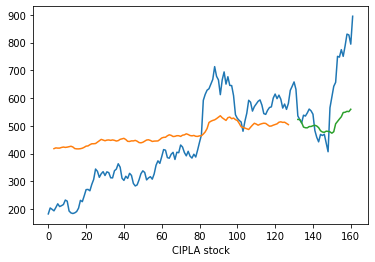

Epoch 1/20
2/2 [==============================] - 14s 2s/step - loss: 0.4823 - val_loss: 0.0677
Epoch 2/20
2/2 [==============================] - 0s 44ms/step - loss: 0.4721 - val_loss: 0.0646
Epoch 3/20
2/2 [==============================] - 0s 42ms/step - loss: 0.4616 - val_loss: 0.0615
Epoch 4/20
2/2 [==============================] - 0s 44ms/step - loss: 0.4506 - val_loss: 0.0583
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.4392 - val_loss: 0.0551
Epoch 6/20
2/2 [==============================] - 0s 42ms/step - loss: 0.4271 - val_loss: 0.0518
Epoch 7/20
2/2 [==============================] - 0s 44ms/step - loss: 0.4139 - val_loss: 0.0483
Epoch 8/20
2/2 [==============================] - 0s 60ms/step - loss: 0.3998 - val_loss: 0.0448
Epoch 9/20
2/2 [==============================] - 0s 42ms/step - loss: 0.3844 - val_loss: 0.0412
Epoch 10/20
2/2 [==============================] - 0s 42ms/step - loss: 0.3672 - val_loss: 0.0374
Epoch 11/20
2/2 [=============

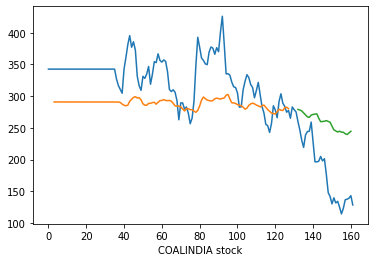

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1565 - val_loss: 0.4423
Epoch 2/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1493 - val_loss: 0.4283
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1422 - val_loss: 0.4138
Epoch 4/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1349 - val_loss: 0.3987
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1274 - val_loss: 0.3827
Epoch 6/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1199 - val_loss: 0.3657
Epoch 7/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1118 - val_loss: 0.3475
Epoch 8/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1035 - val_loss: 0.3279
Epoch 9/20
2/2 [==============================] - 0s 42ms/step - loss: 0.0945 - val_loss: 0.3068
Epoch 10/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0863 - val_loss: 0.2837
Epoch 11/20
2/2 [=============

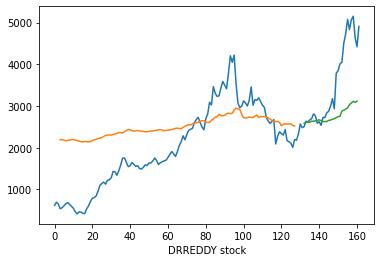

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.1917 - val_loss: 0.2721
Epoch 2/20
2/2 [==============================] - 0s 65ms/step - loss: 0.1881 - val_loss: 0.2655
Epoch 3/20
2/2 [==============================] - 0s 67ms/step - loss: 0.1839 - val_loss: 0.2587
Epoch 4/20
2/2 [==============================] - 0s 60ms/step - loss: 0.1798 - val_loss: 0.2516
Epoch 5/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1757 - val_loss: 0.2442
Epoch 6/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1711 - val_loss: 0.2363
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1665 - val_loss: 0.2280
Epoch 8/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1618 - val_loss: 0.2190
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1562 - val_loss: 0.2093
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1504 - val_loss: 0.1988
Epoch 11/20
2/2 [=============

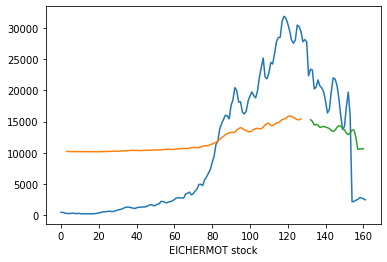

Epoch 1/20
2/2 [==============================] - 14s 2s/step - loss: 0.5292 - val_loss: 0.1065
Epoch 2/20
2/2 [==============================] - 0s 61ms/step - loss: 0.5170 - val_loss: 0.1029
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.5047 - val_loss: 0.0992
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.4917 - val_loss: 0.0955
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.4782 - val_loss: 0.0917
Epoch 6/20
2/2 [==============================] - 0s 44ms/step - loss: 0.4636 - val_loss: 0.0878
Epoch 7/20
2/2 [==============================] - 0s 44ms/step - loss: 0.4482 - val_loss: 0.0838
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.4311 - val_loss: 0.0796
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.4127 - val_loss: 0.0753
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.3922 - val_loss: 0.0708
Epoch 11/20
2/2 [=============

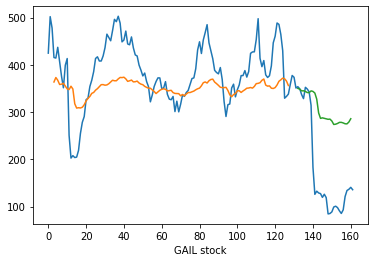

Epoch 1/20
2/2 [==============================] - 13s 3s/step - loss: 0.2632 - val_loss: 0.0053
Epoch 2/20
2/2 [==============================] - 0s 58ms/step - loss: 0.2558 - val_loss: 0.0045
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2485 - val_loss: 0.0037
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2407 - val_loss: 0.0031
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.2330 - val_loss: 0.0025
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2245 - val_loss: 0.0021
Epoch 7/20
2/2 [==============================] - 0s 43ms/step - loss: 0.2155 - val_loss: 0.0018
Epoch 8/20
2/2 [==============================] - 0s 43ms/step - loss: 0.2059 - val_loss: 0.0018
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1954 - val_loss: 0.0021
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1841 - val_loss: 0.0027
Epoch 11/20
2/2 [=============

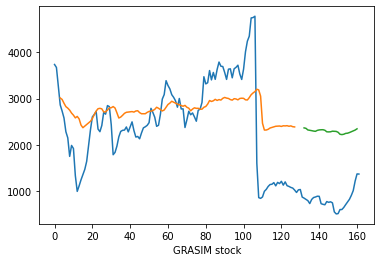

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.1530 - val_loss: 0.1751
Epoch 2/20
2/2 [==============================] - 0s 65ms/step - loss: 0.1482 - val_loss: 0.1689
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1433 - val_loss: 0.1626
Epoch 4/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1381 - val_loss: 0.1561
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1330 - val_loss: 0.1493
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1277 - val_loss: 0.1421
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1221 - val_loss: 0.1346
Epoch 8/20
2/2 [==============================] - 0s 43ms/step - loss: 0.1161 - val_loss: 0.1267
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1102 - val_loss: 0.1181
Epoch 10/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1033 - val_loss: 0.1090
Epoch 11/20
2/2 [=============

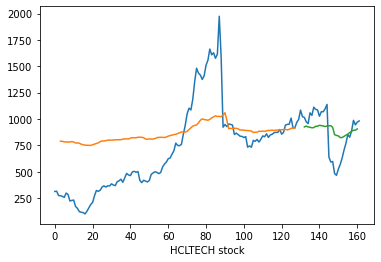

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1789 - val_loss: 0.3872
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1728 - val_loss: 0.3746
Epoch 3/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1664 - val_loss: 0.3616
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1600 - val_loss: 0.3481
Epoch 5/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1533 - val_loss: 0.3338
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1468 - val_loss: 0.3187
Epoch 7/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1396 - val_loss: 0.3026
Epoch 8/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1323 - val_loss: 0.2852
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1243 - val_loss: 0.2663
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1163 - val_loss: 0.2457
Epoch 11/20
2/2 [=============

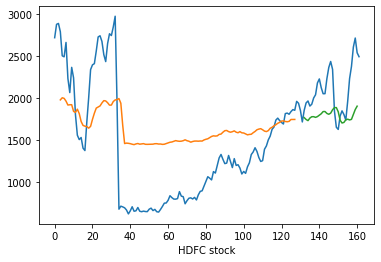

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.2272 - val_loss: 0.3827
Epoch 2/20
2/2 [==============================] - 0s 129ms/step - loss: 0.2220 - val_loss: 0.3751
Epoch 3/20
2/2 [==============================] - 0s 141ms/step - loss: 0.2169 - val_loss: 0.3672
Epoch 4/20
2/2 [==============================] - 0s 209ms/step - loss: 0.2116 - val_loss: 0.3588
Epoch 5/20
2/2 [==============================] - 0s 166ms/step - loss: 0.2062 - val_loss: 0.3500
Epoch 6/20
2/2 [==============================] - 0s 127ms/step - loss: 0.2000 - val_loss: 0.3406
Epoch 7/20
2/2 [==============================] - 0s 114ms/step - loss: 0.1937 - val_loss: 0.3303
Epoch 8/20
2/2 [==============================] - 0s 44ms/step - loss: 0.1871 - val_loss: 0.3191
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1795 - val_loss: 0.3068
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1720 - val_loss: 0.2930
Epoch 11/20
2/2 [=======

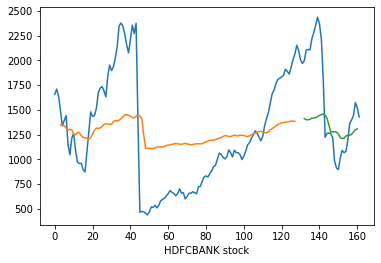

Epoch 1/20
2/2 [==============================] - 14s 2s/step - loss: 0.2895 - val_loss: 0.3917
Epoch 2/20
2/2 [==============================] - 0s 61ms/step - loss: 0.2806 - val_loss: 0.3794
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2714 - val_loss: 0.3667
Epoch 4/20
2/2 [==============================] - 0s 60ms/step - loss: 0.2618 - val_loss: 0.3533
Epoch 5/20
2/2 [==============================] - 0s 49ms/step - loss: 0.2518 - val_loss: 0.3392
Epoch 6/20
2/2 [==============================] - 0s 62ms/step - loss: 0.2413 - val_loss: 0.3241
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2302 - val_loss: 0.3078
Epoch 8/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2180 - val_loss: 0.2902
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.2050 - val_loss: 0.2710
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1911 - val_loss: 0.2497
Epoch 11/20
2/2 [=============

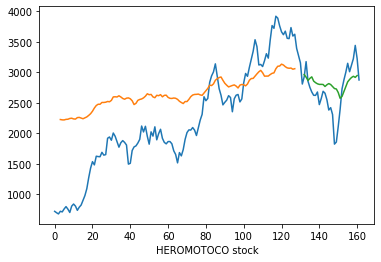

Epoch 1/20
2/2 [==============================] - 13s 3s/step - loss: 0.1320 - val_loss: 0.2574
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1269 - val_loss: 0.2495
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1217 - val_loss: 0.2413
Epoch 4/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1165 - val_loss: 0.2327
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1109 - val_loss: 0.2236
Epoch 6/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1052 - val_loss: 0.2140
Epoch 7/20
2/2 [==============================] - 0s 44ms/step - loss: 0.0994 - val_loss: 0.2037
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0930 - val_loss: 0.1927
Epoch 9/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0864 - val_loss: 0.1808
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.0792 - val_loss: 0.1677
Epoch 11/20
2/2 [=============

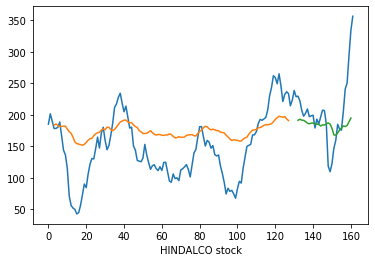

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.0551 - val_loss: 0.6632
Epoch 2/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0516 - val_loss: 0.6449
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0482 - val_loss: 0.6257
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0445 - val_loss: 0.6055
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: 0.0411 - val_loss: 0.5839
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0380 - val_loss: 0.5604
Epoch 7/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0348 - val_loss: 0.5352
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0315 - val_loss: 0.5078
Epoch 9/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0284 - val_loss: 0.4783
Epoch 10/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0262 - val_loss: 0.4455
Epoch 11/20
2/2 [=============

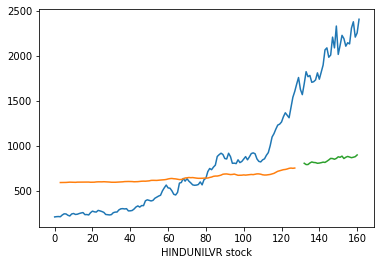

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1843 - val_loss: 0.0246
Epoch 2/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1794 - val_loss: 0.0225
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1743 - val_loss: 0.0205
Epoch 4/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1693 - val_loss: 0.0185
Epoch 5/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1640 - val_loss: 0.0165
Epoch 6/20
2/2 [==============================] - 0s 62ms/step - loss: 0.1585 - val_loss: 0.0145
Epoch 7/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1527 - val_loss: 0.0125
Epoch 8/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1465 - val_loss: 0.0106
Epoch 9/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1396 - val_loss: 0.0087
Epoch 10/20
2/2 [==============================] - 0s 45ms/step - loss: 0.1326 - val_loss: 0.0069
Epoch 11/20
2/2 [=============

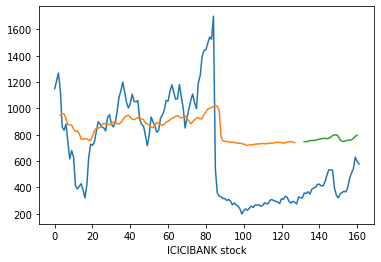

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1583 - val_loss: 0.3550
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1543 - val_loss: 0.3468
Epoch 3/20
2/2 [==============================] - 0s 55ms/step - loss: 0.1500 - val_loss: 0.3382
Epoch 4/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1454 - val_loss: 0.3292
Epoch 5/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1412 - val_loss: 0.3195
Epoch 6/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1362 - val_loss: 0.3090
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1311 - val_loss: 0.2976
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1258 - val_loss: 0.2851
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1202 - val_loss: 0.2712
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1136 - val_loss: 0.2556
Epoch 11/20
2/2 [=============

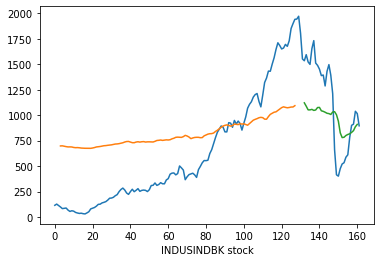

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.2249 - val_loss: 0.0058
Epoch 2/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2164 - val_loss: 0.0049
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.2079 - val_loss: 0.0042
Epoch 4/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1987 - val_loss: 0.0037
Epoch 5/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1897 - val_loss: 0.0035
Epoch 6/20
2/2 [==============================] - 0s 56ms/step - loss: 0.1801 - val_loss: 0.0036
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1699 - val_loss: 0.0041
Epoch 8/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1589 - val_loss: 0.0050
Epoch 9/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1474 - val_loss: 0.0067
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1355 - val_loss: 0.0093
Epoch 11/20
2/2 [=============

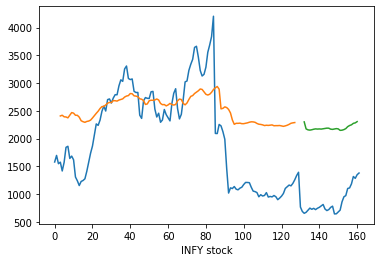

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.2608 - val_loss: 0.0058
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.2501 - val_loss: 0.0047
Epoch 3/20
2/2 [==============================] - 0s 47ms/step - loss: 0.2394 - val_loss: 0.0037
Epoch 4/20
2/2 [==============================] - 0s 47ms/step - loss: 0.2282 - val_loss: 0.0029
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 0.2168 - val_loss: 0.0025
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2046 - val_loss: 0.0023
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1915 - val_loss: 0.0026
Epoch 8/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1773 - val_loss: 0.0034
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.1626 - val_loss: 0.0049
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1465 - val_loss: 0.0075
Epoch 11/20
2/2 [=============

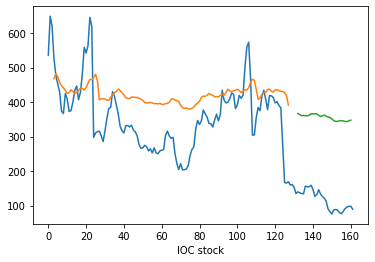

Epoch 1/20
2/2 [==============================] - 14s 2s/step - loss: 0.3043 - val_loss: 0.1461
Epoch 2/20
2/2 [==============================] - 0s 46ms/step - loss: 0.2990 - val_loss: 0.1424
Epoch 3/20
2/2 [==============================] - 0s 46ms/step - loss: 0.2934 - val_loss: 0.1385
Epoch 4/20
2/2 [==============================] - 0s 56ms/step - loss: 0.2877 - val_loss: 0.1344
Epoch 5/20
2/2 [==============================] - 0s 47ms/step - loss: 0.2816 - val_loss: 0.1301
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.2751 - val_loss: 0.1256
Epoch 7/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2682 - val_loss: 0.1209
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.2608 - val_loss: 0.1157
Epoch 9/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2526 - val_loss: 0.1101
Epoch 10/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2436 - val_loss: 0.1041
Epoch 11/20
2/2 [=============

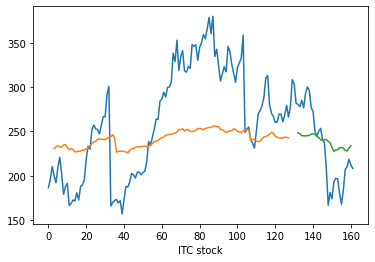

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.2194 - val_loss: 0.0053
Epoch 2/20
2/2 [==============================] - 0s 48ms/step - loss: 0.2109 - val_loss: 0.0041
Epoch 3/20
2/2 [==============================] - 0s 55ms/step - loss: 0.2017 - val_loss: 0.0031
Epoch 4/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1924 - val_loss: 0.0023
Epoch 5/20
2/2 [==============================] - 0s 59ms/step - loss: 0.1831 - val_loss: 0.0018
Epoch 6/20
2/2 [==============================] - 0s 58ms/step - loss: 0.1726 - val_loss: 0.0016
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1623 - val_loss: 0.0019
Epoch 8/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1509 - val_loss: 0.0027
Epoch 9/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1392 - val_loss: 0.0042
Epoch 10/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1259 - val_loss: 0.0068
Epoch 11/20
2/2 [=============

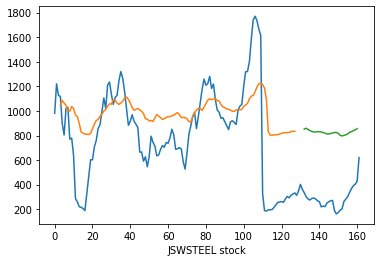

Epoch 1/20
2/2 [==============================] - 20s 3s/step - loss: 0.1052 - val_loss: 0.5534
Epoch 2/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1015 - val_loss: 0.5435
Epoch 3/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0978 - val_loss: 0.5332
Epoch 4/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0941 - val_loss: 0.5221
Epoch 5/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0900 - val_loss: 0.5104
Epoch 6/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0860 - val_loss: 0.4977
Epoch 7/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0817 - val_loss: 0.4838
Epoch 8/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0771 - val_loss: 0.4686
Epoch 9/20
2/2 [==============================] - 0s 48ms/step - loss: 0.0721 - val_loss: 0.4517
Epoch 10/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0669 - val_loss: 0.4326
Epoch 11/20
2/2 [=============

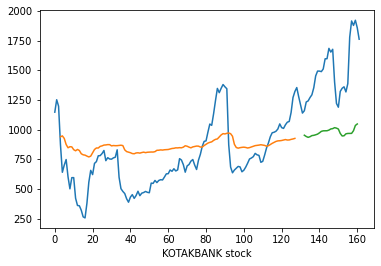

Epoch 1/20
2/2 [==============================] - 20s 2s/step - loss: 0.0782 - val_loss: 0.0310
Epoch 2/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0726 - val_loss: 0.0272
Epoch 3/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0671 - val_loss: 0.0236
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0614 - val_loss: 0.0200
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0556 - val_loss: 0.0166
Epoch 6/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0499 - val_loss: 0.0134
Epoch 7/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0441 - val_loss: 0.0104
Epoch 8/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0387 - val_loss: 0.0078
Epoch 9/20
2/2 [==============================] - 0s 46ms/step - loss: 0.0329 - val_loss: 0.0056
Epoch 10/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0275 - val_loss: 0.0041
Epoch 11/20
2/2 [=============

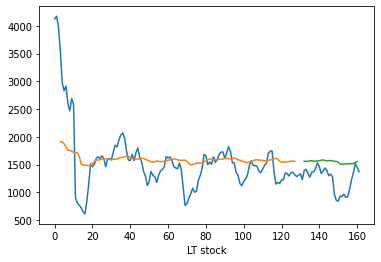

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.3711 - val_loss: 0.0869
Epoch 2/20
2/2 [==============================] - 0s 54ms/step - loss: 0.3595 - val_loss: 0.0812
Epoch 3/20
2/2 [==============================] - 0s 48ms/step - loss: 0.3479 - val_loss: 0.0755
Epoch 4/20
2/2 [==============================] - 0s 50ms/step - loss: 0.3356 - val_loss: 0.0697
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 0.3225 - val_loss: 0.0637
Epoch 6/20
2/2 [==============================] - 0s 48ms/step - loss: 0.3087 - val_loss: 0.0577
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.2944 - val_loss: 0.0515
Epoch 8/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2792 - val_loss: 0.0452
Epoch 9/20
2/2 [==============================] - 0s 69ms/step - loss: 0.2625 - val_loss: 0.0388
Epoch 10/20
2/2 [==============================] - 0s 51ms/step - loss: 0.2439 - val_loss: 0.0323
Epoch 11/20
2/2 [=============

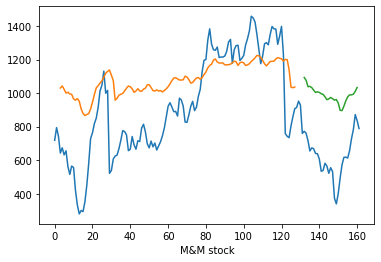

Epoch 1/20
2/2 [==============================] - 21s 3s/step - loss: 0.1428 - val_loss: 0.4866
Epoch 2/20
2/2 [==============================] - 0s 61ms/step - loss: 0.1401 - val_loss: 0.4792
Epoch 3/20
2/2 [==============================] - 0s 70ms/step - loss: 0.1373 - val_loss: 0.4714
Epoch 4/20
2/2 [==============================] - 0s 140ms/step - loss: 0.1345 - val_loss: 0.4633
Epoch 5/20
2/2 [==============================] - 0s 184ms/step - loss: 0.1315 - val_loss: 0.4546
Epoch 6/20
2/2 [==============================] - 0s 208ms/step - loss: 0.1289 - val_loss: 0.4452
Epoch 7/20
2/2 [==============================] - 0s 224ms/step - loss: 0.1255 - val_loss: 0.4352
Epoch 8/20
2/2 [==============================] - 0s 68ms/step - loss: 0.1221 - val_loss: 0.4241
Epoch 9/20
2/2 [==============================] - 0s 166ms/step - loss: 0.1183 - val_loss: 0.4118
Epoch 10/20
2/2 [==============================] - 0s 161ms/step - loss: 0.1144 - val_loss: 0.3980
Epoch 11/20
2/2 [=======

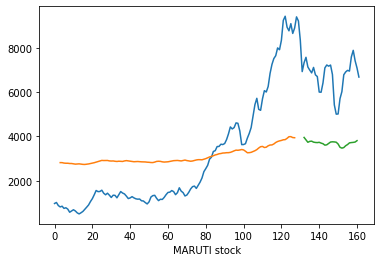

Epoch 1/20
2/2 [==============================] - 18s 3s/step - loss: 0.0342 - val_loss: 0.5885
Epoch 2/20
2/2 [==============================] - 0s 72ms/step - loss: 0.0314 - val_loss: 0.5725
Epoch 3/20
2/2 [==============================] - 0s 73ms/step - loss: 0.0286 - val_loss: 0.5558
Epoch 4/20
2/2 [==============================] - 0s 68ms/step - loss: 0.0259 - val_loss: 0.5383
Epoch 5/20
2/2 [==============================] - 0s 68ms/step - loss: 0.0234 - val_loss: 0.5198
Epoch 6/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0210 - val_loss: 0.5001
Epoch 7/20
2/2 [==============================] - 0s 70ms/step - loss: 0.0187 - val_loss: 0.4791
Epoch 8/20
2/2 [==============================] - 0s 68ms/step - loss: 0.0166 - val_loss: 0.4567
Epoch 9/20
2/2 [==============================] - 0s 68ms/step - loss: 0.0148 - val_loss: 0.4328
Epoch 10/20
2/2 [==============================] - 0s 81ms/step - loss: 0.0133 - val_loss: 0.4075
Epoch 11/20
2/2 [=============

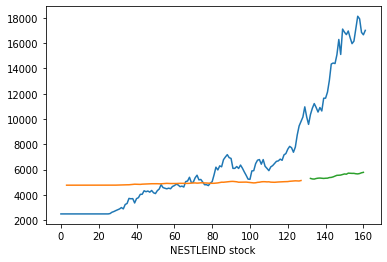

Epoch 1/20
2/2 [==============================] - 14s 3s/step - loss: 0.2833 - val_loss: 0.0475
Epoch 2/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2721 - val_loss: 0.0437
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.2607 - val_loss: 0.0400
Epoch 4/20
2/2 [==============================] - 0s 71ms/step - loss: 0.2490 - val_loss: 0.0363
Epoch 5/20
2/2 [==============================] - 0s 50ms/step - loss: 0.2364 - val_loss: 0.0325
Epoch 6/20
2/2 [==============================] - 0s 49ms/step - loss: 0.2230 - val_loss: 0.0289
Epoch 7/20
2/2 [==============================] - 0s 47ms/step - loss: 0.2089 - val_loss: 0.0253
Epoch 8/20
2/2 [==============================] - 0s 50ms/step - loss: 0.1939 - val_loss: 0.0219
Epoch 9/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1772 - val_loss: 0.0187
Epoch 10/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1594 - val_loss: 0.0161
Epoch 11/20
2/2 [=============

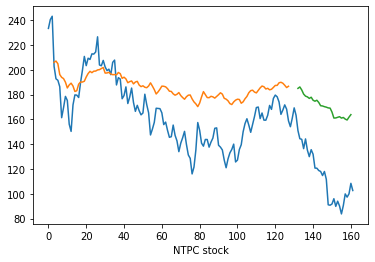

Epoch 1/20
2/2 [==============================] - 19s 5s/step - loss: 0.1814 - val_loss: 0.0014
Epoch 2/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1757 - val_loss: 9.5779e-04
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1697 - val_loss: 6.9981e-04
Epoch 4/20
2/2 [==============================] - 0s 69ms/step - loss: 0.1636 - val_loss: 6.1892e-04
Epoch 5/20
2/2 [==============================] - 0s 48ms/step - loss: 0.1573 - val_loss: 7.5133e-04
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1508 - val_loss: 0.0011
Epoch 7/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1437 - val_loss: 0.0019
Epoch 8/20
2/2 [==============================] - 0s 75ms/step - loss: 0.1361 - val_loss: 0.0030
Epoch 9/20
2/2 [==============================] - 0s 78ms/step - loss: 0.1289 - val_loss: 0.0047
Epoch 10/20
2/2 [==============================] - 0s 47ms/step - loss: 0.1202 - val_loss: 0.0071
Epoch 11/20
2/

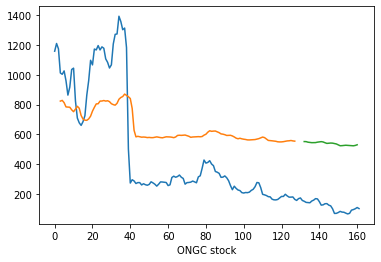

Epoch 1/20
2/2 [==============================] - 22s 3s/step - loss: 0.2021 - val_loss: 0.5978
Epoch 2/20
2/2 [==============================] - 0s 66ms/step - loss: 0.1957 - val_loss: 0.5840
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1894 - val_loss: 0.5694
Epoch 4/20
2/2 [==============================] - 0s 56ms/step - loss: 0.1828 - val_loss: 0.5540
Epoch 5/20
2/2 [==============================] - 0s 84ms/step - loss: 0.1757 - val_loss: 0.5376
Epoch 6/20
2/2 [==============================] - 0s 89ms/step - loss: 0.1685 - val_loss: 0.5199
Epoch 7/20
2/2 [==============================] - 0s 82ms/step - loss: 0.1605 - val_loss: 0.5008
Epoch 8/20
2/2 [==============================] - 0s 101ms/step - loss: 0.1526 - val_loss: 0.4798
Epoch 9/20
2/2 [==============================] - 0s 92ms/step - loss: 0.1444 - val_loss: 0.4566
Epoch 10/20
2/2 [==============================] - 0s 78ms/step - loss: 0.1347 - val_loss: 0.4308
Epoch 11/20
2/2 [============

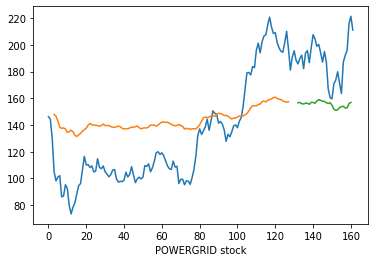

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.0788 - val_loss: 0.1797
Epoch 2/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0758 - val_loss: 0.1735
Epoch 3/20
2/2 [==============================] - 0s 50ms/step - loss: 0.0727 - val_loss: 0.1671
Epoch 4/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0697 - val_loss: 0.1604
Epoch 5/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0667 - val_loss: 0.1535
Epoch 6/20
2/2 [==============================] - 0s 74ms/step - loss: 0.0637 - val_loss: 0.1463
Epoch 7/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0603 - val_loss: 0.1388
Epoch 8/20
2/2 [==============================] - 0s 49ms/step - loss: 0.0573 - val_loss: 0.1308
Epoch 9/20
2/2 [==============================] - 0s 64ms/step - loss: 0.0538 - val_loss: 0.1222
Epoch 10/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0507 - val_loss: 0.1130
Epoch 11/20
2/2 [=============

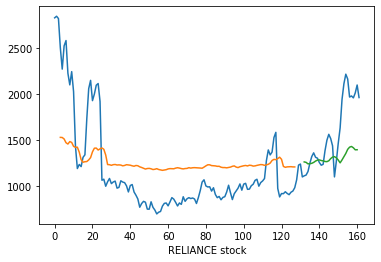

Epoch 1/20
2/2 [==============================] - 15s 2s/step - loss: 0.2622 - val_loss: 0.0012
Epoch 2/20
2/2 [==============================] - 0s 70ms/step - loss: 0.2545 - val_loss: 8.0126e-04
Epoch 3/20
2/2 [==============================] - 0s 75ms/step - loss: 0.2471 - val_loss: 5.1733e-04
Epoch 4/20
2/2 [==============================] - 0s 135ms/step - loss: 0.2384 - val_loss: 4.0427e-04
Epoch 5/20
2/2 [==============================] - 0s 55ms/step - loss: 0.2304 - val_loss: 4.9343e-04
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2217 - val_loss: 8.3301e-04
Epoch 7/20
2/2 [==============================] - 0s 73ms/step - loss: 0.2122 - val_loss: 0.0015
Epoch 8/20
2/2 [==============================] - 0s 78ms/step - loss: 0.2021 - val_loss: 0.0025
Epoch 9/20
2/2 [==============================] - 0s 68ms/step - loss: 0.1914 - val_loss: 0.0041
Epoch 10/20
2/2 [==============================] - 0s 91ms/step - loss: 0.1797 - val_loss: 0.0064
Epoch 11/

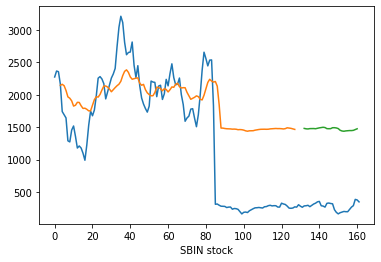

Epoch 1/20
2/2 [==============================] - 21s 3s/step - loss: 0.0905 - val_loss: 0.4808
Epoch 2/20
2/2 [==============================] - 0s 69ms/step - loss: 0.0870 - val_loss: 0.4691
Epoch 3/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0835 - val_loss: 0.4570
Epoch 4/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0799 - val_loss: 0.4444
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0764 - val_loss: 0.4311
Epoch 6/20
2/2 [==============================] - 0s 65ms/step - loss: 0.0729 - val_loss: 0.4169
Epoch 7/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0692 - val_loss: 0.4016
Epoch 8/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0653 - val_loss: 0.3852
Epoch 9/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0614 - val_loss: 0.3673
Epoch 10/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0578 - val_loss: 0.3477
Epoch 11/20
2/2 [=============

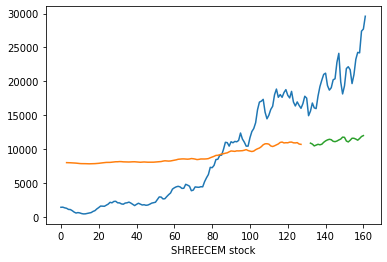

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.1384 - val_loss: 0.0044
Epoch 2/20
2/2 [==============================] - 0s 55ms/step - loss: 0.1347 - val_loss: 0.0037
Epoch 3/20
2/2 [==============================] - 0s 61ms/step - loss: 0.1309 - val_loss: 0.0031
Epoch 4/20
2/2 [==============================] - 0s 59ms/step - loss: 0.1269 - val_loss: 0.0026
Epoch 5/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1229 - val_loss: 0.0022
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1188 - val_loss: 0.0018
Epoch 7/20
2/2 [==============================] - 0s 59ms/step - loss: 0.1143 - val_loss: 0.0015
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1098 - val_loss: 0.0014
Epoch 9/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1047 - val_loss: 0.0015
Epoch 10/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0996 - val_loss: 0.0018
Epoch 11/20
2/2 [=============

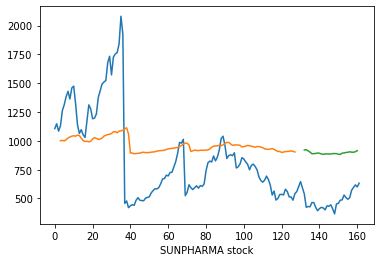

Epoch 1/20
2/2 [==============================] - 15s 2s/step - loss: 0.1538 - val_loss: 0.0062
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1487 - val_loss: 0.0053
Epoch 3/20
2/2 [==============================] - 0s 52ms/step - loss: 0.1433 - val_loss: 0.0044
Epoch 4/20
2/2 [==============================] - 0s 49ms/step - loss: 0.1380 - val_loss: 0.0037
Epoch 5/20
2/2 [==============================] - 0s 61ms/step - loss: 0.1324 - val_loss: 0.0030
Epoch 6/20
2/2 [==============================] - 0s 55ms/step - loss: 0.1268 - val_loss: 0.0025
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1206 - val_loss: 0.0022
Epoch 8/20
2/2 [==============================] - 0s 58ms/step - loss: 0.1141 - val_loss: 0.0021
Epoch 9/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1069 - val_loss: 0.0023
Epoch 10/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0998 - val_loss: 0.0028
Epoch 11/20
2/2 [=============

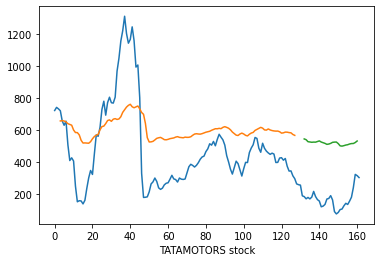

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.1824 - val_loss: 0.1643
Epoch 2/20
2/2 [==============================] - 0s 58ms/step - loss: 0.1748 - val_loss: 0.1566
Epoch 3/20
2/2 [==============================] - 0s 57ms/step - loss: 0.1672 - val_loss: 0.1488
Epoch 4/20
2/2 [==============================] - 0s 59ms/step - loss: 0.1594 - val_loss: 0.1406
Epoch 5/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1510 - val_loss: 0.1322
Epoch 6/20
2/2 [==============================] - 0s 55ms/step - loss: 0.1426 - val_loss: 0.1233
Epoch 7/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1336 - val_loss: 0.1140
Epoch 8/20
2/2 [==============================] - 0s 61ms/step - loss: 0.1242 - val_loss: 0.1041
Epoch 9/20
2/2 [==============================] - 0s 64ms/step - loss: 0.1138 - val_loss: 0.0937
Epoch 10/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1034 - val_loss: 0.0827
Epoch 11/20
2/2 [=============

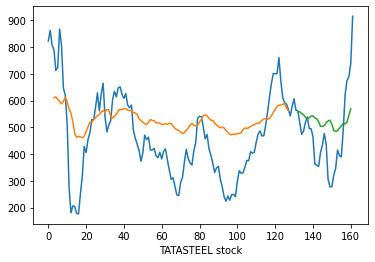

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.2414 - val_loss: 0.3804
Epoch 2/20
2/2 [==============================] - 0s 59ms/step - loss: 0.2354 - val_loss: 0.3712
Epoch 3/20
2/2 [==============================] - 0s 70ms/step - loss: 0.2292 - val_loss: 0.3616
Epoch 4/20
2/2 [==============================] - 0s 55ms/step - loss: 0.2228 - val_loss: 0.3516
Epoch 5/20
2/2 [==============================] - 0s 53ms/step - loss: 0.2160 - val_loss: 0.3410
Epoch 6/20
2/2 [==============================] - 0s 64ms/step - loss: 0.2090 - val_loss: 0.3297
Epoch 7/20
2/2 [==============================] - 0s 53ms/step - loss: 0.2014 - val_loss: 0.3175
Epoch 8/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1933 - val_loss: 0.3042
Epoch 9/20
2/2 [==============================] - 0s 59ms/step - loss: 0.1850 - val_loss: 0.2896
Epoch 10/20
2/2 [==============================] - 0s 67ms/step - loss: 0.1751 - val_loss: 0.2735
Epoch 11/20
2/2 [=============

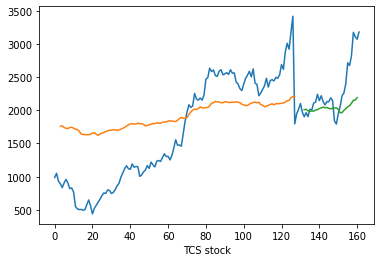

Epoch 1/20
2/2 [==============================] - 15s 2s/step - loss: 0.1044 - val_loss: 0.0378
Epoch 2/20
2/2 [==============================] - 0s 67ms/step - loss: 0.1008 - val_loss: 0.0349
Epoch 3/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0971 - val_loss: 0.0320
Epoch 4/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0932 - val_loss: 0.0291
Epoch 5/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0893 - val_loss: 0.0262
Epoch 6/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0854 - val_loss: 0.0231
Epoch 7/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0811 - val_loss: 0.0201
Epoch 8/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0767 - val_loss: 0.0170
Epoch 9/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0722 - val_loss: 0.0139
Epoch 10/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0673 - val_loss: 0.0108
Epoch 11/20
2/2 [=============

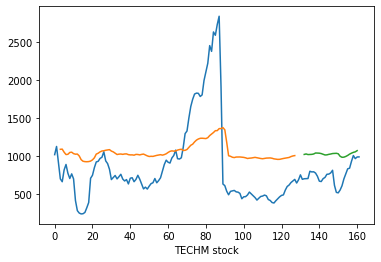

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.0900 - val_loss: 0.0609
Epoch 2/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0868 - val_loss: 0.0564
Epoch 3/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0835 - val_loss: 0.0518
Epoch 4/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0803 - val_loss: 0.0472
Epoch 5/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0771 - val_loss: 0.0425
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0738 - val_loss: 0.0378
Epoch 7/20
2/2 [==============================] - 0s 70ms/step - loss: 0.0707 - val_loss: 0.0330
Epoch 8/20
2/2 [==============================] - 0s 52ms/step - loss: 0.0674 - val_loss: 0.0282
Epoch 9/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0643 - val_loss: 0.0234
Epoch 10/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0612 - val_loss: 0.0186
Epoch 11/20
2/2 [=============

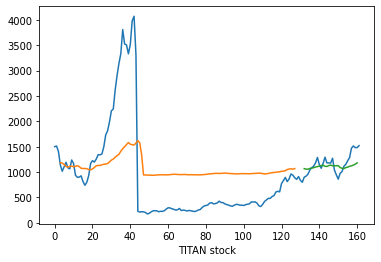

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.1104 - val_loss: 0.4057
Epoch 2/20
2/2 [==============================] - 0s 56ms/step - loss: 0.1077 - val_loss: 0.3993
Epoch 3/20
2/2 [==============================] - 0s 70ms/step - loss: 0.1050 - val_loss: 0.3928
Epoch 4/20
2/2 [==============================] - 0s 58ms/step - loss: 0.1022 - val_loss: 0.3859
Epoch 5/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0995 - val_loss: 0.3786
Epoch 6/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0964 - val_loss: 0.3709
Epoch 7/20
2/2 [==============================] - 0s 55ms/step - loss: 0.0934 - val_loss: 0.3627
Epoch 8/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0902 - val_loss: 0.3538
Epoch 9/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0867 - val_loss: 0.3440
Epoch 10/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0828 - val_loss: 0.3333
Epoch 11/20
2/2 [=============

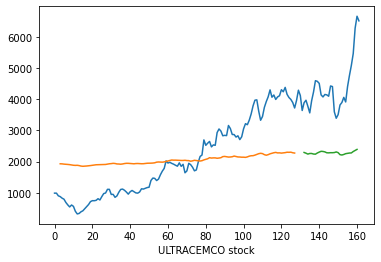

Epoch 1/20
2/2 [==============================] - 13s 2s/step - loss: 0.0925 - val_loss: 0.0585
Epoch 2/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0885 - val_loss: 0.0547
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: 0.0844 - val_loss: 0.0509
Epoch 4/20
2/2 [==============================] - 0s 58ms/step - loss: 0.0804 - val_loss: 0.0470
Epoch 5/20
2/2 [==============================] - 0s 73ms/step - loss: 0.0762 - val_loss: 0.0430
Epoch 6/20
2/2 [==============================] - 0s 60ms/step - loss: 0.0717 - val_loss: 0.0389
Epoch 7/20
2/2 [==============================] - 0s 72ms/step - loss: 0.0672 - val_loss: 0.0348
Epoch 8/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0628 - val_loss: 0.0305
Epoch 9/20
2/2 [==============================] - 0s 59ms/step - loss: 0.0580 - val_loss: 0.0261
Epoch 10/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0528 - val_loss: 0.0216
Epoch 11/20
2/2 [=============

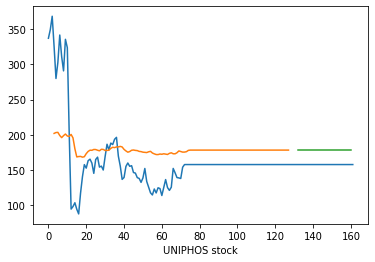

Epoch 1/20
2/2 [==============================] - 22s 2s/step - loss: 0.1192 - val_loss: 0.3342
Epoch 2/20
2/2 [==============================] - 0s 51ms/step - loss: 0.1158 - val_loss: 0.3251
Epoch 3/20
2/2 [==============================] - 0s 53ms/step - loss: 0.1125 - val_loss: 0.3156
Epoch 4/20
2/2 [==============================] - 0s 54ms/step - loss: 0.1093 - val_loss: 0.3057
Epoch 5/20
2/2 [==============================] - 0s 61ms/step - loss: 0.1057 - val_loss: 0.2952
Epoch 6/20
2/2 [==============================] - 0s 57ms/step - loss: 0.1021 - val_loss: 0.2842
Epoch 7/20
2/2 [==============================] - 0s 61ms/step - loss: 0.0985 - val_loss: 0.2723
Epoch 8/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0948 - val_loss: 0.2596
Epoch 9/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0915 - val_loss: 0.2456
Epoch 10/20
2/2 [==============================] - 0s 56ms/step - loss: 0.0875 - val_loss: 0.2306
Epoch 11/20
2/2 [=============

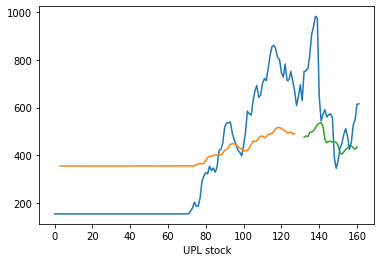

Epoch 1/20
2/2 [==============================] - 14s 3s/step - loss: 0.0348 - val_loss: 2.2474e-04
Epoch 2/20
2/2 [==============================] - 0s 53ms/step - loss: 0.0336 - val_loss: 1.0275e-04
Epoch 3/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0327 - val_loss: 9.5001e-05
Epoch 4/20
2/2 [==============================] - 0s 94ms/step - loss: 0.0317 - val_loss: 2.1255e-04
Epoch 5/20
2/2 [==============================] - 0s 105ms/step - loss: 0.0309 - val_loss: 4.6847e-04
Epoch 6/20
2/2 [==============================] - 0s 102ms/step - loss: 0.0301 - val_loss: 8.7184e-04
Epoch 7/20
2/2 [==============================] - 0s 57ms/step - loss: 0.0296 - val_loss: 0.0014
Epoch 8/20
2/2 [==============================] - 0s 54ms/step - loss: 0.0291 - val_loss: 0.0022
Epoch 9/20
2/2 [==============================] - 0s 86ms/step - loss: 0.0288 - val_loss: 0.0030
Epoch 10/20
2/2 [==============================] - 0s 77ms/step - loss: 0.0284 - val_loss: 0.0039
Epoc

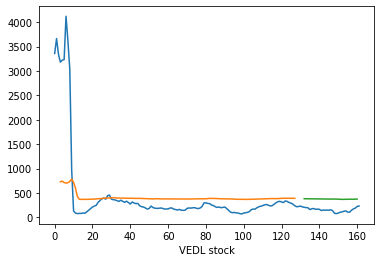

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.3055 - val_loss: 0.0537
Epoch 2/20
2/2 [==============================] - 0s 55ms/step - loss: 0.2973 - val_loss: 0.0506
Epoch 3/20
2/2 [==============================] - 0s 70ms/step - loss: 0.2891 - val_loss: 0.0476
Epoch 4/20
2/2 [==============================] - 0s 62ms/step - loss: 0.2804 - val_loss: 0.0445
Epoch 5/20
2/2 [==============================] - 0s 59ms/step - loss: 0.2714 - val_loss: 0.0415
Epoch 6/20
2/2 [==============================] - 0s 57ms/step - loss: 0.2618 - val_loss: 0.0384
Epoch 7/20
2/2 [==============================] - 0s 59ms/step - loss: 0.2519 - val_loss: 0.0353
Epoch 8/20
2/2 [==============================] - 0s 58ms/step - loss: 0.2414 - val_loss: 0.0321
Epoch 9/20
2/2 [==============================] - 0s 86ms/step - loss: 0.2299 - val_loss: 0.0290
Epoch 10/20
2/2 [==============================] - 0s 136ms/step - loss: 0.2173 - val_loss: 0.0259
Epoch 11/20
2/2 [============

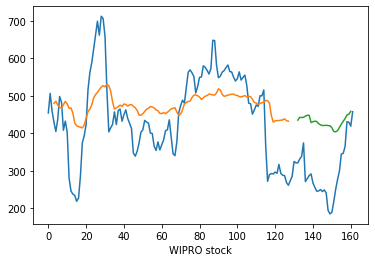

Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 0.2393 - val_loss: 0.1738
Epoch 2/20
2/2 [==============================] - 0s 85ms/step - loss: 0.2332 - val_loss: 0.1679
Epoch 3/20
2/2 [==============================] - 0s 52ms/step - loss: 0.2268 - val_loss: 0.1620
Epoch 4/20
2/2 [==============================] - 0s 54ms/step - loss: 0.2203 - val_loss: 0.1557
Epoch 5/20
2/2 [==============================] - 0s 68ms/step - loss: 0.2135 - val_loss: 0.1492
Epoch 6/20
2/2 [==============================] - 0s 57ms/step - loss: 0.2062 - val_loss: 0.1423
Epoch 7/20
2/2 [==============================] - 0s 56ms/step - loss: 0.1985 - val_loss: 0.1349
Epoch 8/20
2/2 [==============================] - 0s 59ms/step - loss: 0.1902 - val_loss: 0.1270
Epoch 9/20
2/2 [==============================] - 0s 72ms/step - loss: 0.1812 - val_loss: 0.1184
Epoch 10/20
2/2 [==============================] - 0s 64ms/step - loss: 0.1714 - val_loss: 0.1091
Epoch 11/20
2/2 [=============

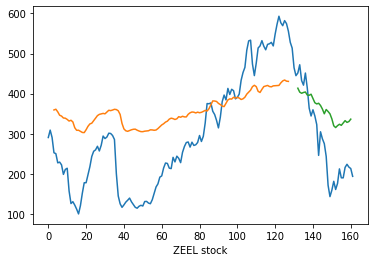

In [44]:
# LSTM are sensitive to the scale of the daya,so we apply MinMax scaler
for i in stocks_dfm.columns:
    scaler=MinMaxScaler(feature_range=(0,1))
    df1=scaler.fit_transform(np.array(stocks_dfm[i]).reshape(-1,1))


    train_data,test_data=df1[0:129],df1[129:len(stocks_dfm)]
    
    time_step = 3
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)

    ### Creating the Stacked LSTM model
    model=Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(3,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(25,return_sequences=True))
    model.add(LSTM(15,return_sequences=True))

    model.add(LSTM(5))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')   
    model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)
    ###Prediction
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)


    ###Transformback to original form
    train_predict=scaler.inverse_transform(train_predict)
    test_predict=scaler.inverse_transform(test_predict)

    ###Calculating perfomance metrics
    mae = metrics.mean_absolute_error(ytest,test_predict)
    mse = metrics.mean_squared_error(ytest,test_predict)
    rmse = np.sqrt(mse) #mse**(0.5)  

    print("Results of sklearn.metrics:")
    print("MAE:",mae)
    print("RMSE:", rmse)

    ### Plotting
    # Shift train predictions for plotting
    look_back=3
    trainPredictPlot = numpy.empty_like(df1)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    # Shift test predictions for plotting
    testPredictPlot = numpy.empty_like(df1)
    testPredictPlot[:, :] = numpy.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
    # Plot baseline and predictions
    plt.plot(scaler.inverse_transform(df1))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.xlabel(i+' stock')
    plt.show()

By observing plots of actual vs prediction,we can tell that RNN model peforms better than the rest for most of the stocks.